In [1]:
#.libPaths(c("/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1","/home/data/refdir/Rlib"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
rm(list = ls())
setwd('/home/data/t060324/jobs/aimin/')

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians

In [108]:
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [109]:
mergeData_CAF_m <- readRDS(file='./output/1.sangleCell_pre/OV_mergeData_CAF_m.RDS')

In [128]:
mergeData_CAF_m <- RunUMAP(mergeData_CAF_m,reduction = "pca",dims = 1:50,seed.use = 12345)
mergeData_CAF_m <- FindNeighbors(mergeData_CAF_m,reduction = 'pca', dims = 1:50, verbose = FALSE)
mergeData_CAF_m <- RunTSNE(mergeData_CAF_m,reduction = 'pca',dims = 1:50,seed.use = 12345)
mergeData_CAF_m <- FindClusters(mergeData_CAF_m,resolution = 1, verbose = FALSE,random.seed=20210707)

14:24:47 UMAP embedding parameters a = 0.9922 b = 1.112

14:24:47 Read 26405 rows and found 50 numeric columns

14:24:47 Using Annoy for neighbor search, n_neighbors = 30

14:24:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:24:52 Writing NN index file to temp file /home/data/t060324/Rtmp/Rtmplp0DJd/file319b335b5f4f15

14:24:52 Searching Annoy index using 1 thread, search_k = 3000

14:25:03 Annoy recall = 100%

14:25:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:25:11 Initializing from normalized Laplacian + noise (using irlba)

14:25:34 Commencing optimization for 200 epochs, with 1227654 positive edges

14:25:54 Optimization finished



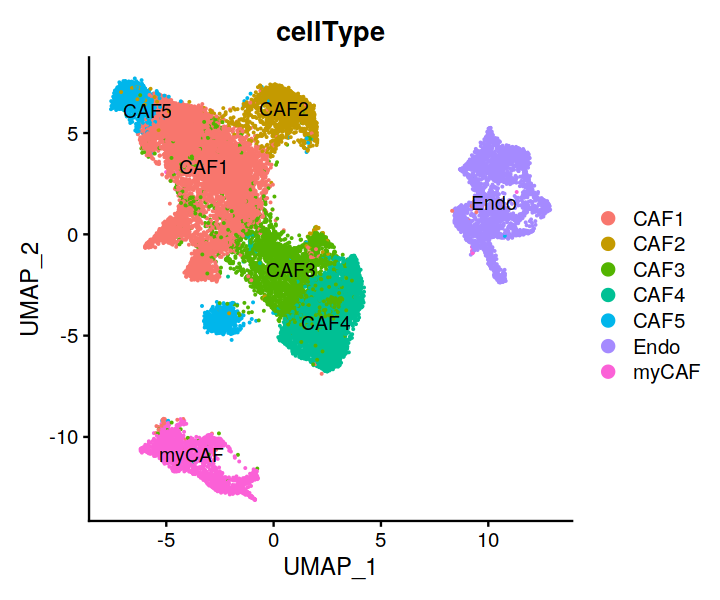

In [129]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimPCAF <- DimPlot(object = mergeData_CAF_m,reduction = 'umap',group.by = c('cellType'), label = T)
dimPCAF

In [130]:
OV_GSE165897_CAF <- subset(mergeData_CAF_m,dataset=='GSE165897')

In [110]:
mergeData_TAM <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_TAM.RDS')

In [121]:
OV_GSE165897_Marc <- subset(mergeData_TAM,cellType %in% c('Macro_C1QB' ,'Macro_CCL3L3', 'Macro_CXCL10',  'Macro_MARCO','Macro_MT1H',   'Macro_SPP1','Mono_FCN1'))
OV_GSE165897_Marc <- subset(OV_GSE165897_Marc,dataset=='GSE165897')

In [112]:
library(AUCell)

In [113]:
OV_GSE165897 <- readRDS(file = './output/GSE165897.merge.object.rds')
OV_GSE165897_epi <- subset(OV_GSE165897,cellType_auto %in% c('Epi'))
OV_GSE165897_epi@meta.data <- OV_GSE165897_epi@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]
OV_GSE165897_epi$cellType <- OV_GSE165897_epi$cellType_auto
OV_GSE165897_epi[['module_AUC']] <- NULL
OV_GSE165897_epi$cellType <- ifelse(grepl(pattern = 'primary',OV_GSE165897_epi$sample),'Epi-pre','Epi-post')

In [122]:
table(OV_GSE165897_epi$cellType)


Epi-post  Epi-pre 
    4168     4513 

In [114]:
all_gene <- rownames(OV_GSE165897@assays$RNA@data)
head(all_gene)

[1] "RP11-34P13.7"  "RP11-34P13.8"  "CICP27"        "RP11-34P13.15"
[5] "RP11-34P13.13" "FO538757.1"

In [16]:
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [17]:
modules_list2 <- list()
for(i in names(modules_list)){
    modules_list2[[i]] <- intersect(modules_list[[i]],all_gene)
}

ERROR: Error in intersect(modules_list[[i]], all_gene): object 'all_gene' not found


In [54]:
library(GSEABase)
library(AUCell)

Loading required package: annotate

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: XML

Loading required package: graph


Attaching package: ‘graph’


The following object is masked from ‘package:XML’:

    addNode




In [55]:
?AUCell_calcAUC

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



   min     1%     5%    10%    50%   100% 
 587.0 1085.0 1245.0 1401.6 2467.0 7707.0 


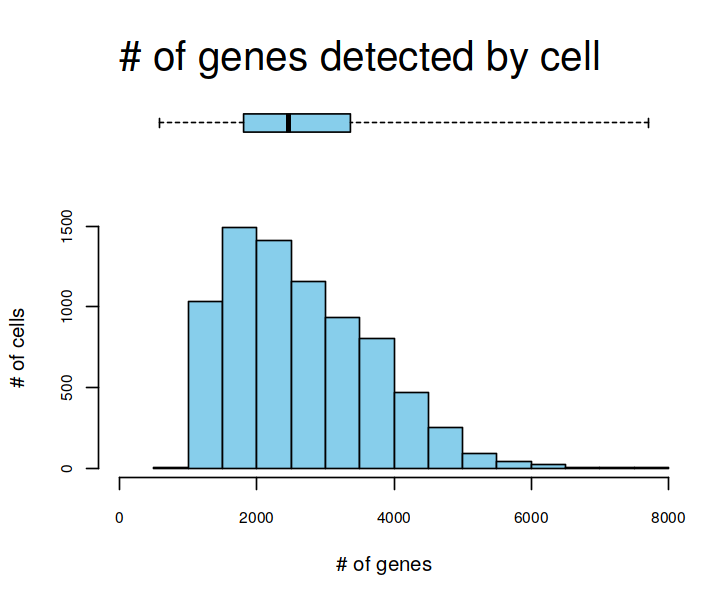

In [132]:
cells_rankings <- AUCell_buildRankings(OV_GSE165897_CAF@assays$RNA@data)
cells_AUC <- AUCell_calcAUC(modules_list2, cells_rankings, aucMaxRank=nrow(cells_rankings)*0.1)

In [133]:
OV_GSE165897_CAF$AUC <- as.numeric(getAUC(cells_AUC)['c1_53', ])

In [139]:
saveRDS(OV_GSE165897_CAF,file='./output/1.sangleCell_pre/OV_GSE165897_CAF.RDS')

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 513  571  720  830 1433 3994 


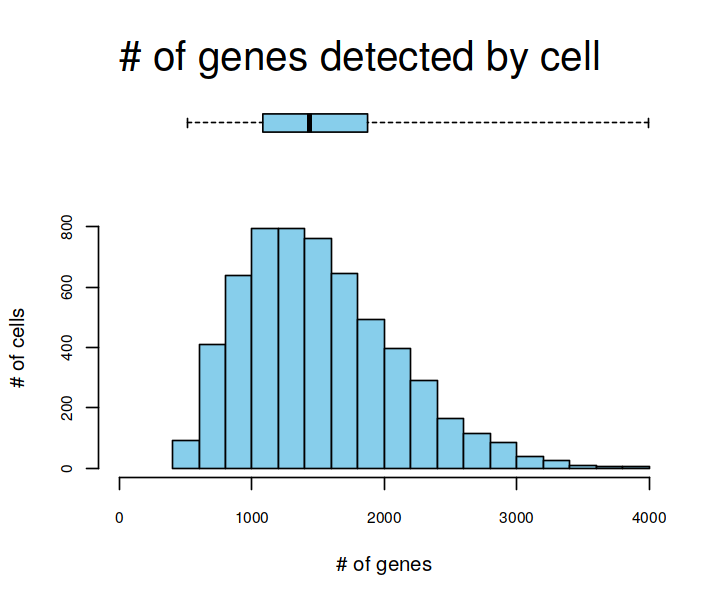

In [140]:
cells_rankings <- AUCell_buildRankings(OV_GSE165897_Marc@assays$RNA@data)
cells_AUC <- AUCell_calcAUC(modules_list2, cells_rankings, aucMaxRank=nrow(cells_rankings)*0.1)

In [141]:
OV_GSE165897_Marc$AUC <- as.numeric(getAUC(cells_AUC)['c1_53', ])

In [142]:
saveRDS(OV_GSE165897_Marc,file='./output/1.sangleCell_pre/OV_GSE165897_Marc.RDS')

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 1021.0  1685.8  1931.0  2148.0  3662.0 10778.0 


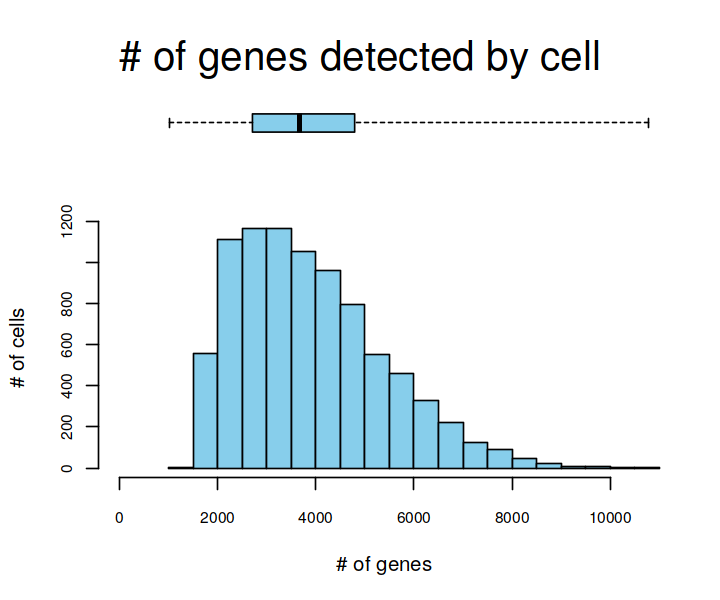

In [144]:
cells_rankings <- AUCell_buildRankings(OV_GSE165897_epi@assays$RNA@data)
cells_AUC <- AUCell_calcAUC(modules_list2, cells_rankings, aucMaxRank=nrow(cells_rankings)*0.1)

In [145]:
OV_GSE165897_epi$AUC <- as.numeric(getAUC(cells_AUC)['c1_53', ]) 

In [146]:
saveRDS(OV_GSE165897_epi,file='./output/1.sangleCell_pre/OV_GSE165897_EOC.RDS')

In [7]:
library(ggraph)


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry




In [8]:
library(viridis)

Loading required package: viridisLite



In [33]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [148]:
library(CytoTRACE)

In [ ]:
##conda activate cellphonedb
setwd('/home/data/t060324/jobs/aimin/')

library(CytoTRACE)
OV_GSE165897_EOC <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_EOC.RDS')
expr <- as.matrix(OV_GSE165897_EOC@assays$RNA@counts)
results <- CytoTRACE(mat=expr,enableFast=F)
saveRDS(results,file='./output/1.sangleCell_pre/CytoTRACE_EOC_results.RDS')
gc()


OV_GSE165897_Stromal <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_CAF.RDS')
expr <- as.matrix(OV_GSE165897_Stromal@assays$RNA@counts)
results2 <- CytoTRACE(mat=expr,enableFast=F)
saveRDS(results2,file='./output/1.sangleCell_pre/CytoTRACE_CAF_results.RDS')

OV_GSE165897_Marc <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_Marc.RDS')
expr <- as.matrix(OV_GSE165897_Marc@assays$RNA@counts)
results3 <- CytoTRACE(mat=expr,enableFast=F)
saveRDS(results3,file='./output/1.sangleCell_pre/CytoTRACE_Marc_results.RDS')


In [ ]:
setwd('/home/data/t060324/jobs/aimin/')
library(CytoTRACE)
library(Seurat)
OV_GSE165897_EOC <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_EOC.RDS')
OV_GSE165897_EOC_list <- SplitObject(object = OV_GSE165897_EOC,split.by = 'patient_id')
for(i in names(OV_GSE165897_EOC_list)){
print(i)
expr <- as.matrix(OV_GSE165897_EOC_list[[i]]@assays$RNA@counts)
results <- CytoTRACE(mat=expr,enableFast=F)
saveRDS(results,file=paste0('./output/1.sangleCell_pre/CytoTRACE_EOC/',i,'/CytoTRACE_results.RDS'))
OV_GSE165897_EOC_list[[i]]$CytoTRACE <- results$CytoTRACE
    
phe <- OV_GSE165897_EOC_list[[i]]$cellType
names(phe) <-rownames(OV_GSE165897_EOC_list[[i]]@meta.data)
plotCytoTRACE(results, phenotype = phe,outputDir = paste0('./output/1.sangleCell_pre/CytoTRACE_EOC/',i,'/'))
#可视化与 CytoTRACE 相关的基因
plotCytoGenes(results, numOfGenes = 20,outputDir = paste0('./output/1.sangleCell_pre/CytoTRACE_EOC/',i,'/'))

}

## 1.Running CytoTRACE for EOC

Running t-SNE. To use your own coordinates, use the 'emb' flag.

file saved to ./output/1.sangleCell_pre/CytoTRACE_EOC/CytoTRACE_plot.pdf



png 
  2

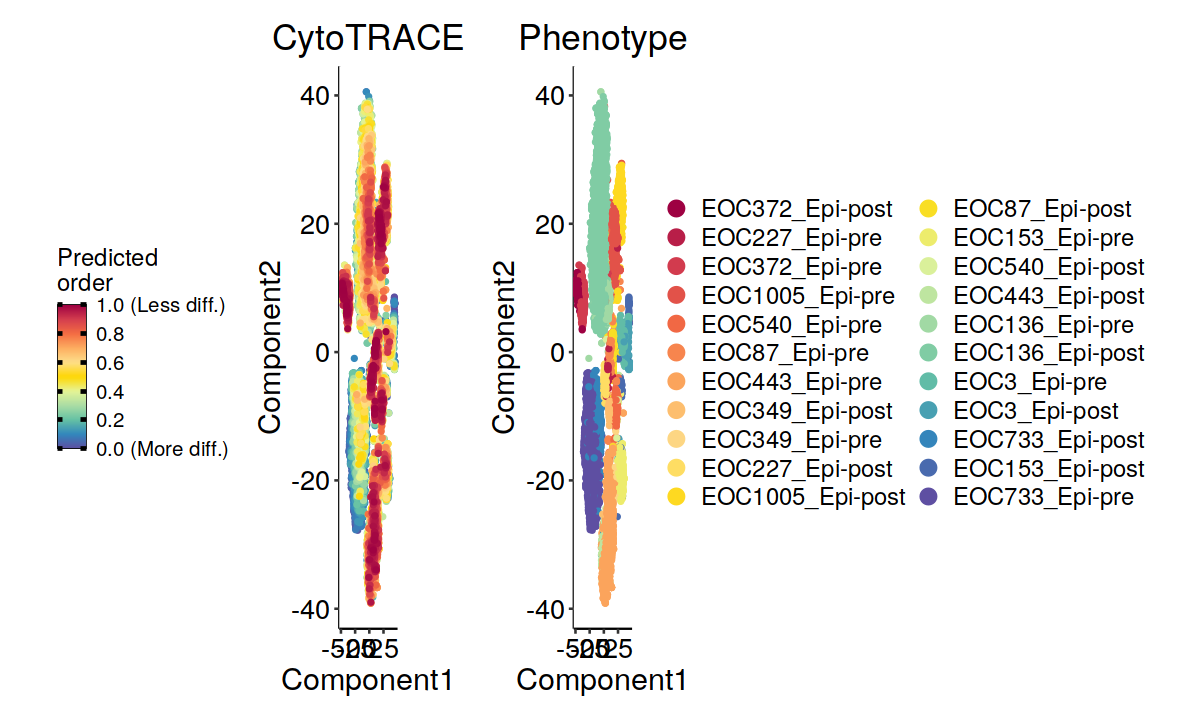

In [232]:
options(repr.plot.height = 6, repr.plot.width = 10)
results <- readRDS(file='./output/1.sangleCell_pre/CytoTRACE_EOC_results.RDS')
OV_GSE165897_EOC <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_EOC.RDS')
phe <- paste0(OV_GSE165897_EOC$patient_id,'_',OV_GSE165897_EOC$cellType)
names(phe) <-rownames(OV_GSE165897_EOC@meta.data)
plotCytoTRACE(results, phenotype = phe,outputDir = './output/1.sangleCell_pre/CytoTRACE_EOC/')
#可视化与 CytoTRACE 相关的基因
plotCytoGenes(results, numOfGenes = 20,outputDir = './output/1.sangleCell_pre/CytoTRACE_EOC/')


In [2]:
results <- readRDS(file='./output/1.sangleCell_pre/CytoTRACE_EOC_results.RDS')
OV_GSE165897_EOC <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_EOC.RDS')

In [3]:
OV_GSE165897_EOC$CytoTRACE <- results$CytoTRACE
head(OV_GSE165897_EOC)

orig.ident nCount_RNA nFeature_RNA
AAACCTGCAGGTTTCA-EOC372_pPer GSE165897  33534      5700        
AAACCTGGTCCGAATT-EOC372_pPer GSE165897  17828      3196        
AAAGATGCATCTGGTA-EOC372_pPer GSE165897   9999      2148        
AAAGTAGTCGCTTAGA-EOC372_pPer GSE165897  17819      3438        
AAATGCCAGGTGCACA-EOC372_pPer GSE165897  11506      2839        
AAATGCCAGTACGATA-EOC372_pPer GSE165897   5553      1773        
AACCATGCACGTTGGC-EOC372_pPer GSE165897  46567      6572        
AACTCAGGTACATCCA-EOC372_pPer GSE165897  18190      3919        
AACTCCCGTAAACACA-EOC372_pPer GSE165897  17146      3775        
AACTCCCTCCAAAGTC-EOC372_pPer GSE165897  31602      4939        
                             sample                    patient_id cellType_auto
AAACCTGCAGGTTTCA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAACCTGGTCCGAATT-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAAGATGCATCTGGTA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAAGTAGTCGCTTAGA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAATGCCAGGTGCACA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAATGCCAGTACGATA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACCATGCACGTTGGC-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCAGGTACATCCA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCCCGTAAACACA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCCCTCCAAAGTC-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
                             dataset mitoRatio    log10GenesPerUMI riboRatio   
AAACCTGCAGGTTTCA-EOC372_pPer NA      0.0456253355 0.8299386        4.562534e-04
AAACCTGGTCCGAATT-EOC372_pPer NA      0.1165021315 0.8243995        1.165021e-03
AAAGATGCATCTGGTA-EOC372_pPer NA      0.1033103310 0.8330176        1.033103e-03
AAAGTAGTCGCTTAGA-EOC372_pPer NA      0.0946181043 0.8318991        9.461810e-04
AAATGCCAGGTGCACA-EOC372_pPer NA      0.1008169651 0.8503397        1.008170e-03
AAATGCCAGTACGATA-EOC372_pPer NA      0.0001800828 0.8675884        1.800828e-06
AACCATGCACGTTGGC-EOC372_pPer NA      0.1180879163 0.8178307        1.180879e-03
AACTCAGGTACATCCA-EOC372_pPer NA      0.0472237493 0.8435015        4.722375e-04
AACTCCCGTAAACACA-EOC372_pPer NA      0.0811851161 0.8447755        8.118512e-04
AACTCCCTCCAAAGTC-EOC372_pPer NA      0.1013227011 0.8208607        1.013227e-03
                             ⋯ seurat_clusters cellType RNA_snn_res.0.5
AAACCTGCAGGTTTCA-EOC372_pPer ⋯ 17              Epi-pre  17             
AAACCTGGTCCGAATT-EOC372_pPer ⋯ 17              Epi-pre  17             
AAAGATGCATCTGGTA-EOC372_pPer ⋯ 17              Epi-pre  17             
AAAGTAGTCGCTTAGA-EOC372_pPer ⋯ 17              Epi-pre  17             
AAATGCCAGGTGCACA-EOC372_pPer ⋯ 17              Epi-pre  17             
AAATGCCAGTACGATA-EOC372_pPer ⋯ 17              Epi-pre  17             
AACCATGCACGTTGGC-EOC372_pPer ⋯ 17              Epi-pre  17             
AACTCAGGTACATCCA-EOC372_pPer ⋯ 17              Epi-pre  17             
AACTCCCGTAAACACA-EOC372_pPer ⋯ 17              Epi-pre  17             
AACTCCCTCCAAAGTC-EOC372_pPer ⋯ 17              Epi-pre  17             
                             integrated_snn_res.0.5 cellType_rough 
AAACCTGCAGGTTTCA-EOC372_pPer NA                     epithelial cell
AAACCTGGTCCGAATT-EOC372_pPer NA                     epithelial cell
AAAGATGCATCTGGTA-EOC372_pPer NA                     epithelial cell
AAAGTAGTCGCTTAGA-EOC372_pPer NA                     epithelial cell
AAATGCCAGGTGCACA-EOC372_pPer NA                     epithelial cell
AAATGCCAGTACGATA-EOC372_pPer NA                     epithelial cell
AACCATGCACGTTGGC-EOC372_pPer NA                     epithelial cell
AACTCAGGTACATCCA-EOC372_pPer NA                     epithelial cell
AACTCCCGTAAACACA-EOC372_pPer NA                     epithelial cell
AACTCCCTCCAAAGTC-EOC372_pPer NA                     epithelial cell
                         

In [4]:
OV_GSE165897_EOC$M53 <- OV_GSE165897_EOC$AUC

In [7]:
OV_GSE165897_EOC <- RunTSNE(OV_GSE165897_EOC,reduction = 'pca',dims = 1:50,seed.use = 12345)

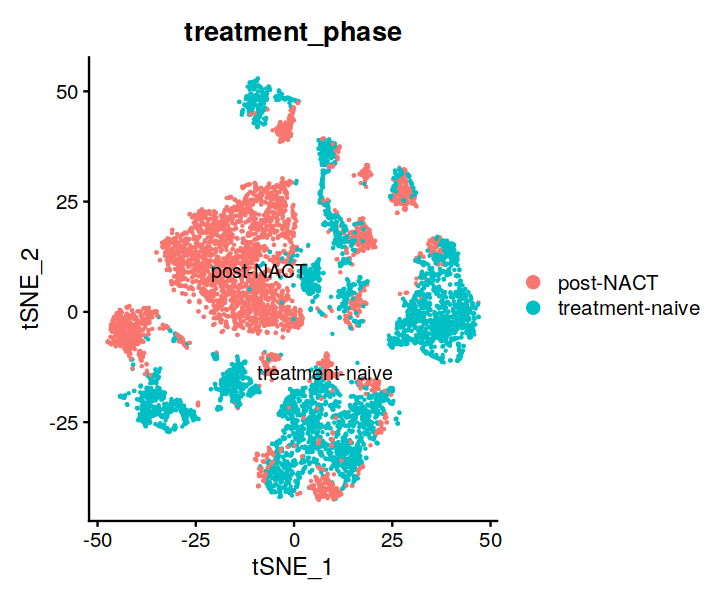

In [11]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimPEOC <- DimPlot(object = OV_GSE165897_EOC,reduction = 'tsne',group.by = c('treatment_phase'), label = T)
dimPEOC

In [18]:
temp <- RColorBrewer::brewer.pal(11, "Spectral")
rbPal <- colorRampPalette(temp)

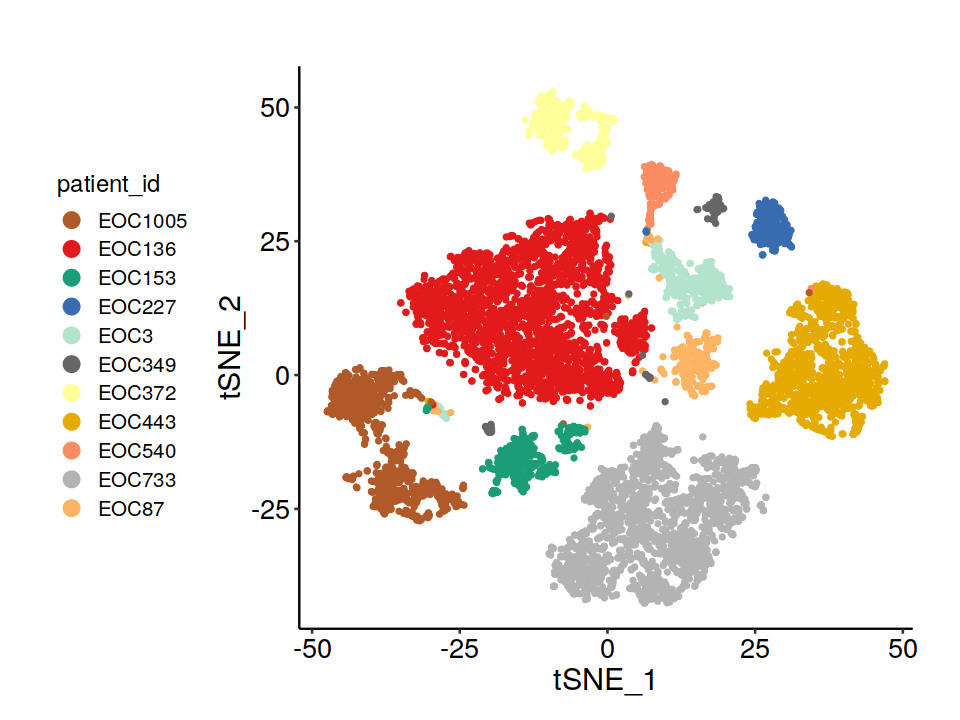

In [27]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector,length(unique(OV_GSE165897_EOC@meta.data$patient_id)))

p4 <- ggplot2::ggplot(data.frame(OV_GSE165897_EOC@meta.data, OV_GSE165897_EOC@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = patient_id),
            size = 1) + ggplot2::scale_colour_manual(values = cellType_col, 
                guide = ggplot2::guide_legend(frame.colour = "black", 
                  override.aes = list(size = 4))) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p4

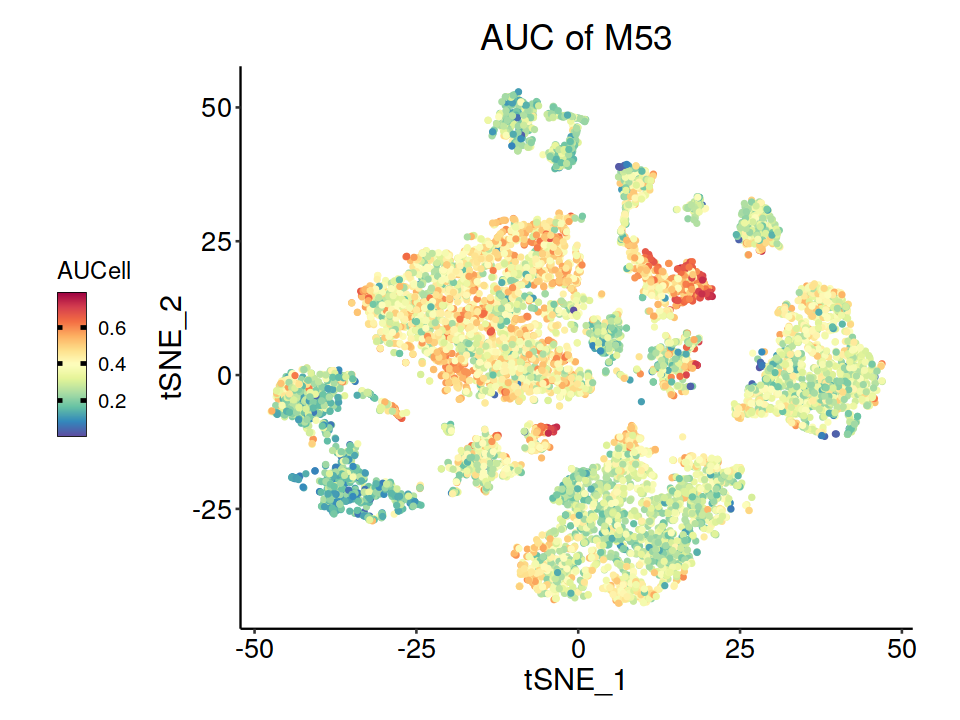

In [21]:
p5 <- ggplot2::ggplot(data.frame(OV_GSE165897_EOC@meta.data, OV_GSE165897_EOC@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = AUC), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "AUCell", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 0.8, 0.2), labels = c('0.0', 
                0.2, 0.4, 0.6,'0.8')) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "AUC of M53") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p5

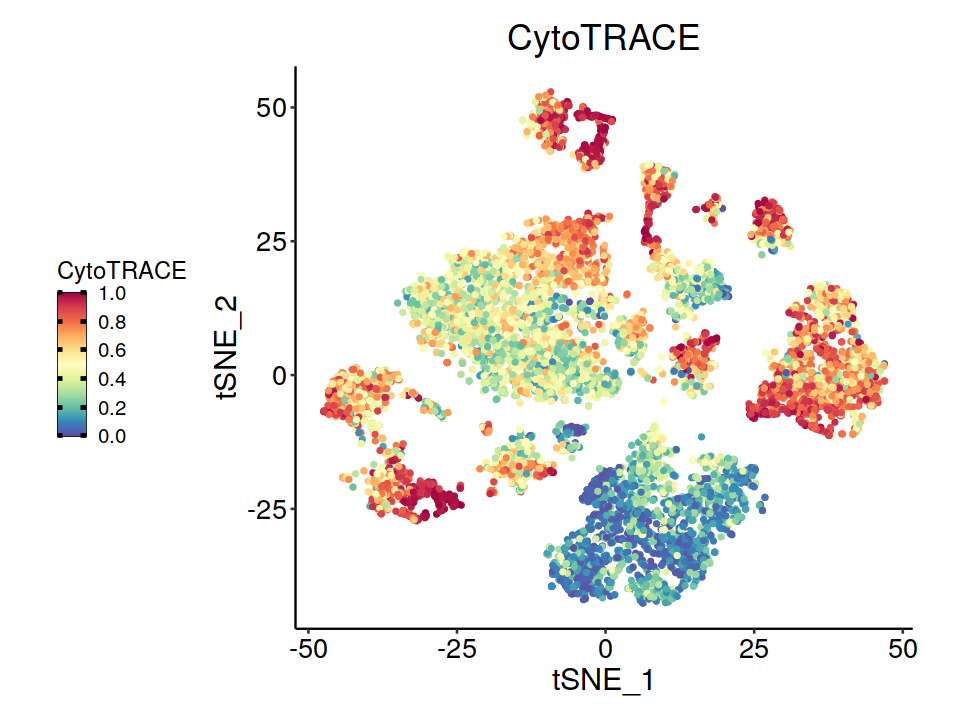

In [22]:
p6 <- ggplot2::ggplot(data.frame(OV_GSE165897_EOC@meta.data, OV_GSE165897_EOC@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = CytoTRACE), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "CytoTRACE", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 1, 0.2), labels = c("0.0", 
                0.2, 0.4, 0.6,0.8,'1.0')) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "CytoTRACE") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p6

In [23]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




`geom_smooth()` using formula = 'y ~ x'


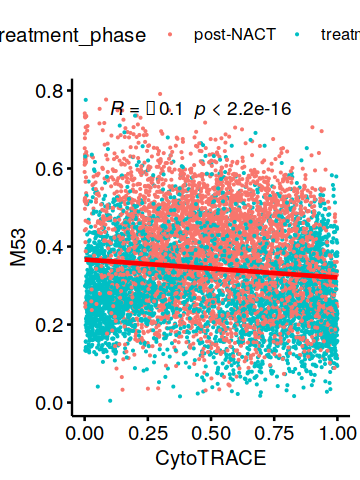

In [33]:
p2 <- ggscatter(data = OV_GSE165897_EOC@meta.data,x = 'CytoTRACE',y = 'M53',color = 'treatment_phase',size = 0.1,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.x = 0.1, label.sep = "\\n"))
options(repr.plot.height = 4, repr.plot.width = 3)
p2

In [32]:
pdf(file = './output/bulk/section_5/3.CytoTRACEvsM53_EOC_plot.pdf',width = 6,height = 5)
print(p4)
print(p5)
print(p6)
print(dimPEOC)
dev.off()

png 
  2

In [35]:
pdf(file = './output/bulk/section_5/3.CytoTRACEvsM53_EOC_plot2.pdf',width = 3,height = 4)
print(p2)
dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”


png 
  2

In [43]:
OV_GSE165897_EOC$treatment_phase <- as.factor(OV_GSE165897_EOC$treatment_phase)

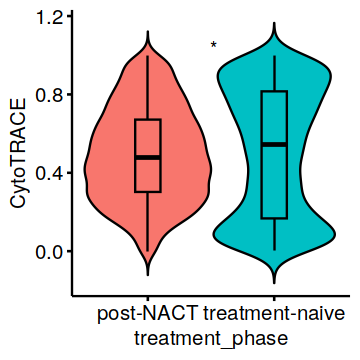

In [44]:
options(repr.plot.height = 3, repr.plot.width = 3)
p2 <- ggviolin(data = OV_GSE165897_EOC@meta.data,x = 'treatment_phase',y = 'CytoTRACE',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p2

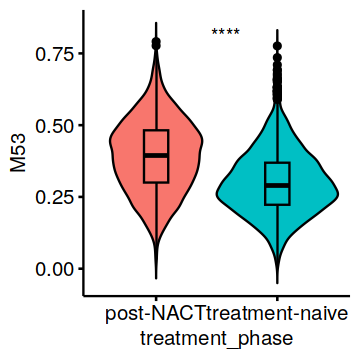

In [45]:
options(repr.plot.height = 3, repr.plot.width = 3)
p3 <- ggviolin(data = OV_GSE165897_EOC@meta.data,x = 'treatment_phase',y = 'M53',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p3

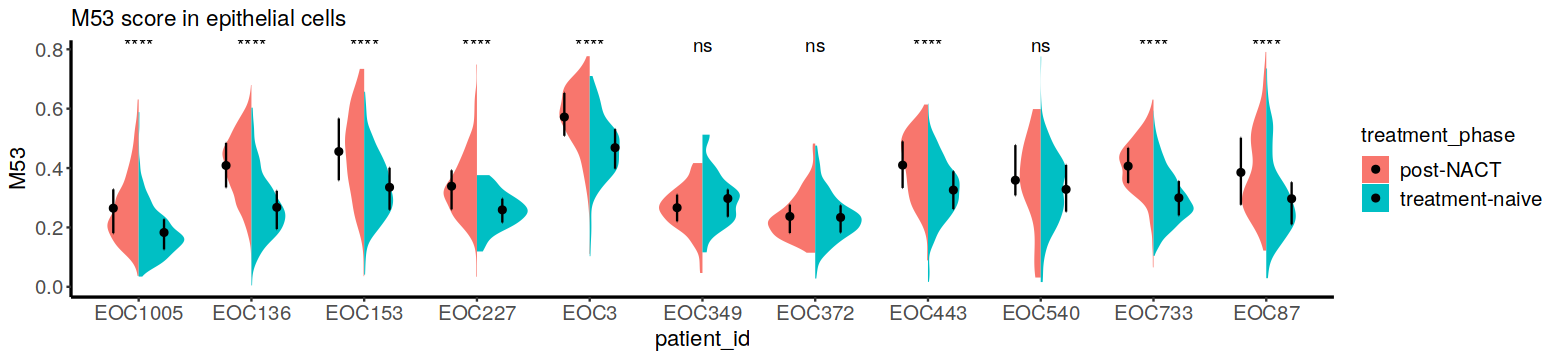

In [49]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot1 <- ggplot(OV_GSE165897_EOC@meta.data,aes(x=patient_id,y = M53,fill=treatment_phase))+
 ggtitle('M53 score in epithelial cells') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_EOC@meta.data,label =  "p.signif", label.x = 1.5)
vplot1

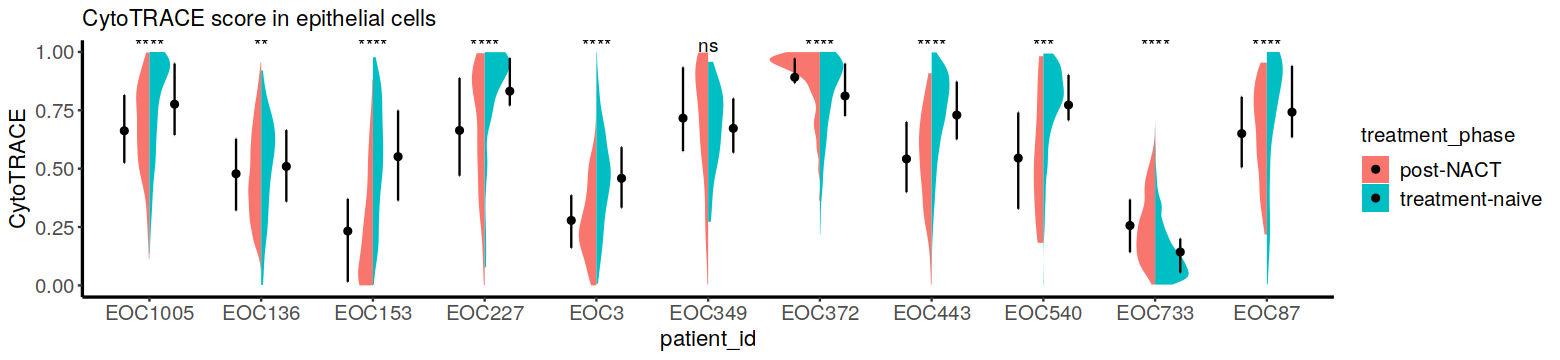

In [51]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot2 <- ggplot(OV_GSE165897_EOC@meta.data,aes(x=patient_id,y = CytoTRACE,fill=treatment_phase))+
 ggtitle('CytoTRACE score in epithelial cells') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_EOC@meta.data,label =  "p.signif", label.x = 1.5)
vplot2

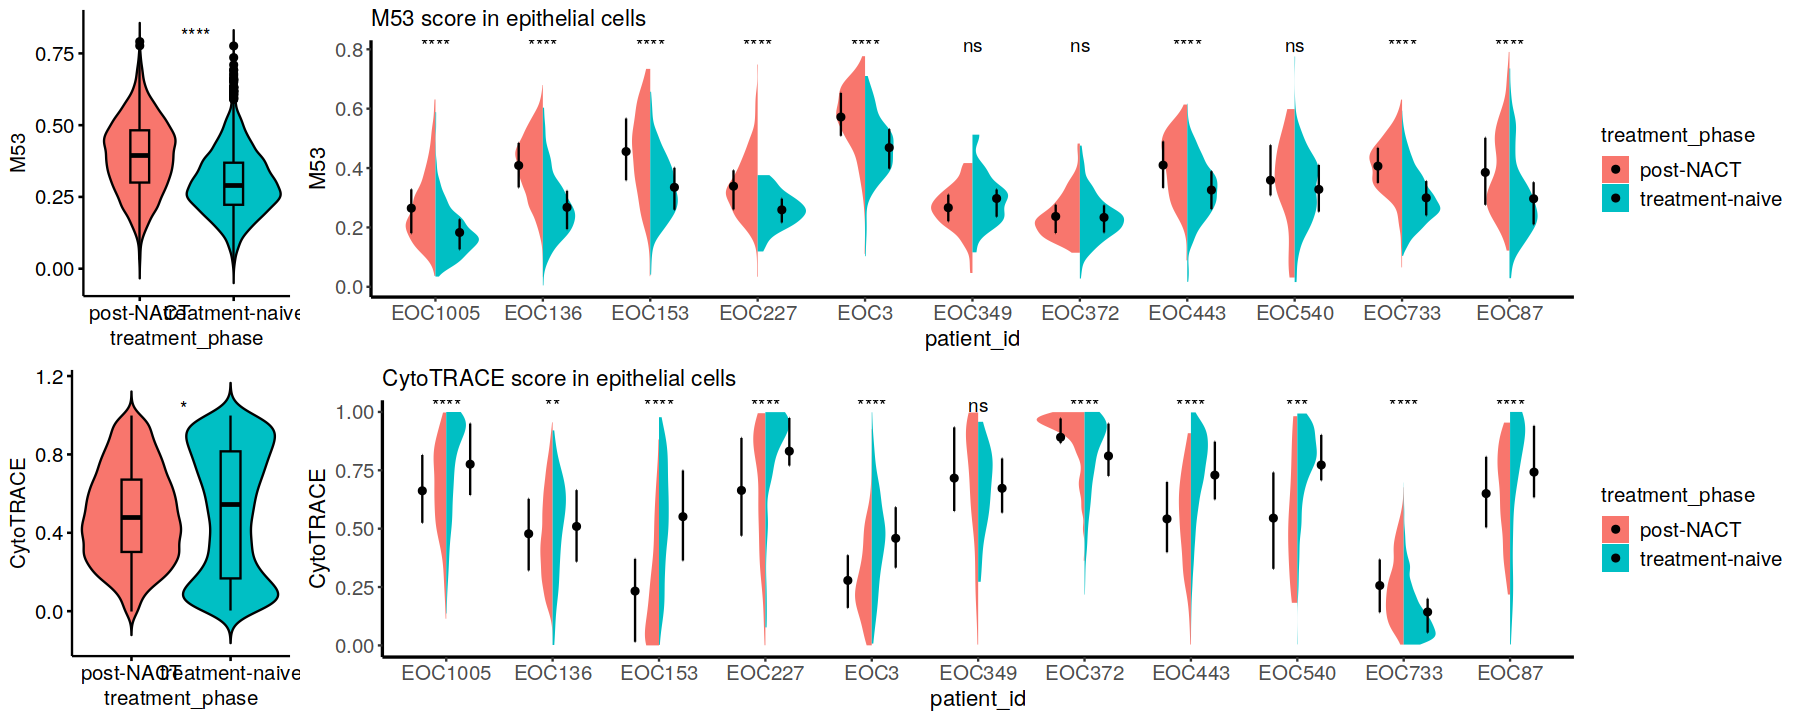

In [52]:
options(repr.plot.height = 6, repr.plot.width = 15)
grid.arrange(p3,vplot1,p2,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))

In [53]:
pdf(file = './output/bulk/section_5/3.NACT_preVSpost_CytoTRACE_M53_boxplot_EOC.pdf',width = 15,height = 6)
grid.arrange(p3,vplot1,p2,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))
dev.off()

png 
  2

## 2.Running CytoTRACE for Stromal cells

In [2]:
CytoTRACE_CAF_results <- readRDS(file='./output/1.sangleCell_pre/CytoTRACE_CAF_results.RDS')
OV_GSE165897_Stromal <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_CAF.RDS')

Running t-SNE. To use your own coordinates, use the 'emb' flag.

file saved to ./output/1.sangleCell_pre/CytoTRACE_CAF/CytoTRACE_plot.pdf



png 
  2

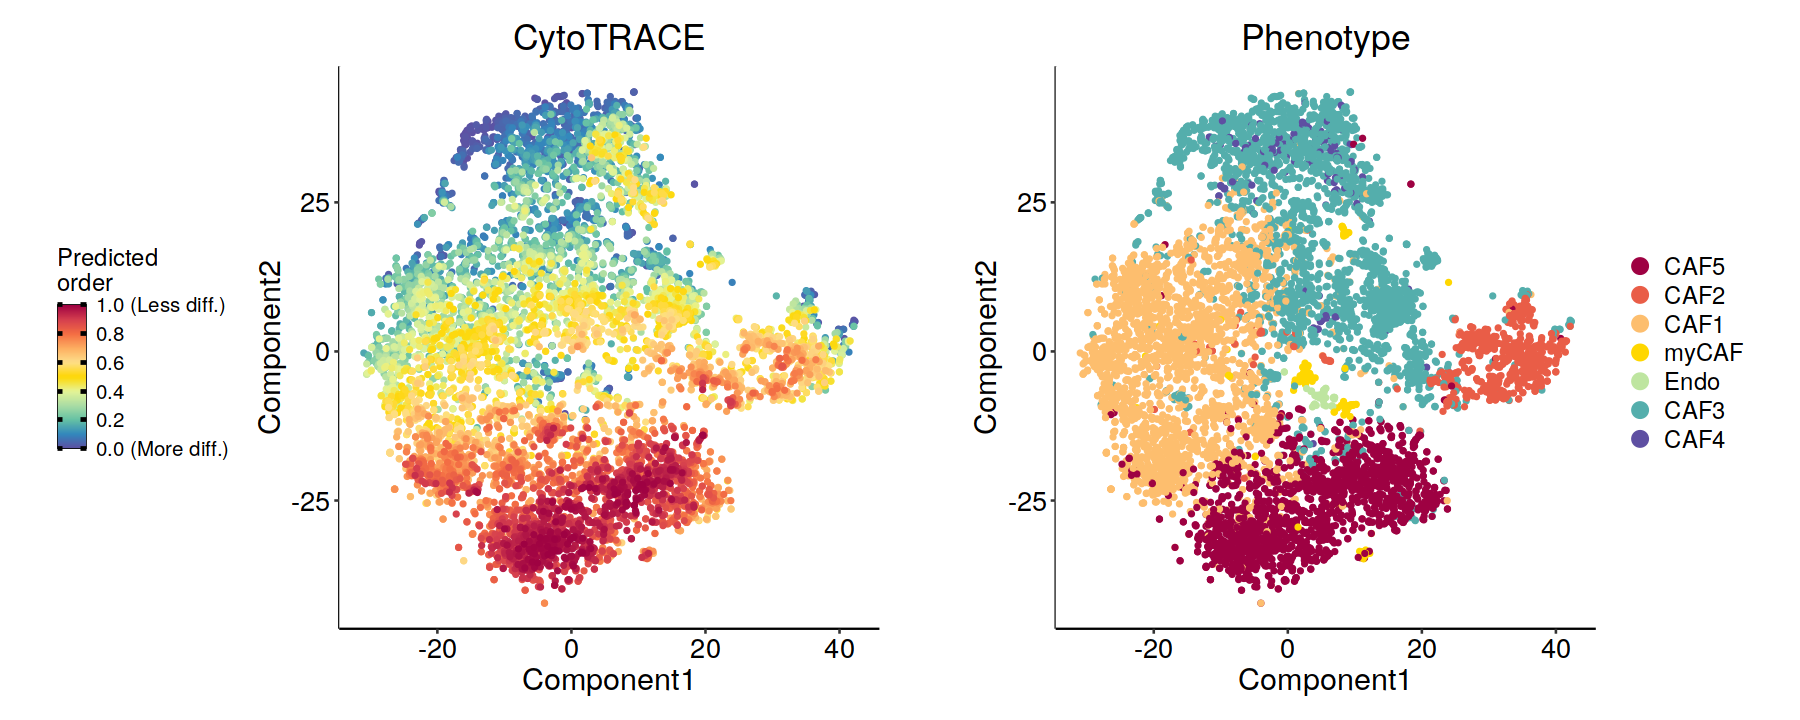

In [165]:
options(repr.plot.height = 6, repr.plot.width = 15)
CytoTRACE_CAF_results <- readRDS(file='./output/1.sangleCell_pre/CytoTRACE_CAF_results.RDS')
OV_GSE165897_Stromal <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_CAF.RDS')
phe <- OV_GSE165897_Stromal$cellType
names(phe) <- rownames(OV_GSE165897_Stromal@meta.data)
plotCytoTRACE(CytoTRACE_CAF_results, phenotype = phe,outputDir = './output/1.sangleCell_pre/CytoTRACE_CAF/')
plotCytoGenes(CytoTRACE_CAF_results, numOfGenes = 20,outputDir = './output/1.sangleCell_pre/CytoTRACE_CAF/')


In [167]:
OV_GSE165897_Stromal$CytoTRACE <- CytoTRACE_CAF_results$CytoTRACE
OV_GSE165897_Stromal$M53 <- OV_GSE165897_Stromal$AUC

In [12]:
temp <- RColorBrewer::brewer.pal(11, "Spectral")
rbPal <- colorRampPalette(temp)

In [169]:
OV_GSE165897_Stromal$cellType <- as.factor(OV_GSE165897_Stromal$cellType)

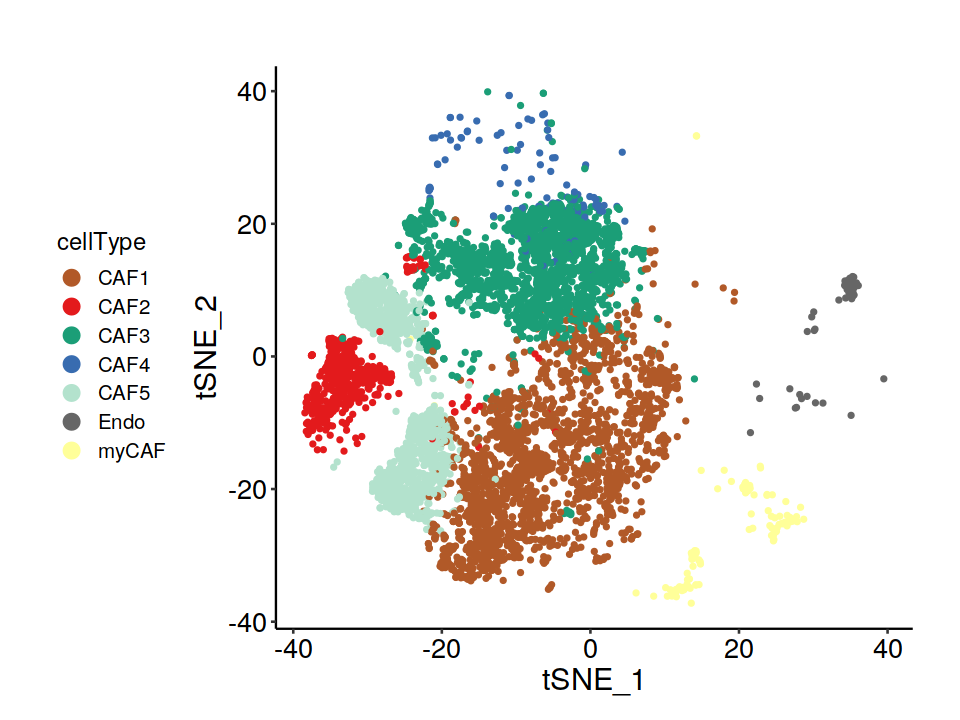

In [170]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, length(unique(OV_GSE165897_Stromal@meta.data$cellType)))

p4 <- ggplot2::ggplot(data.frame(OV_GSE165897_Stromal@meta.data, OV_GSE165897_Stromal@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = cellType), 
            size = 1) + ggplot2::scale_colour_manual(values = cellType_col, 
                guide = ggplot2::guide_legend(frame.colour = "black", 
                  override.aes = list(size = 4))) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p4

In [55]:
DefaultAssay(OV_GSE165897_Stromal) <- 'RNA'

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


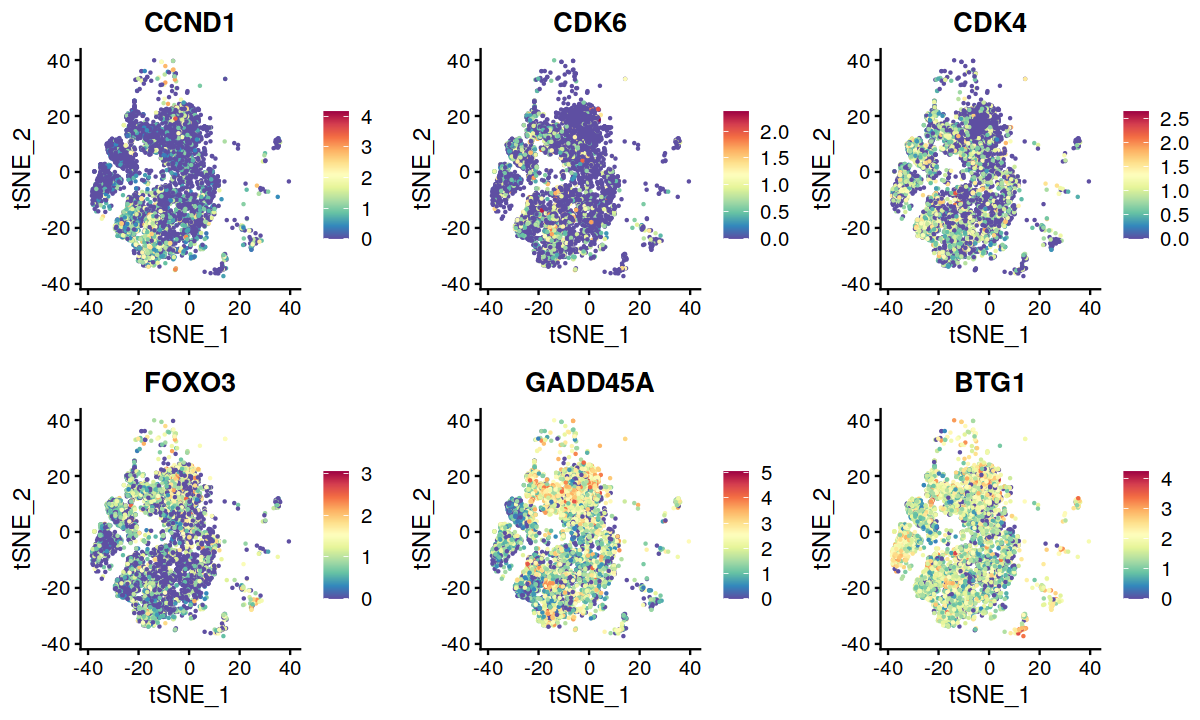

In [146]:
options(repr.plot.height = 6, repr.plot.width = 10)
test <- FeaturePlot(OV_GSE165897_Stromal,features = c('CCND1','CDK6','CDK4','FOXO3','GADD45A','BTG1'),reduction = 'tsne',combine = FALSE ,ncol = 3)
fix.sc <- scale_color_gradientn( colours = rev(rbPal(50)))
pcellCycleGenes <- lapply(test, function (x) x + fix.sc)
CombinePlots(pcellCycleGenes)

In [147]:
pdf(file = './output/bulk/section_5/3.CAF_cellCycleGenes_plot.pdf',width = 10,height = 6)
CombinePlots(pcellCycleGenes)
dev.off()

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


png 
  2

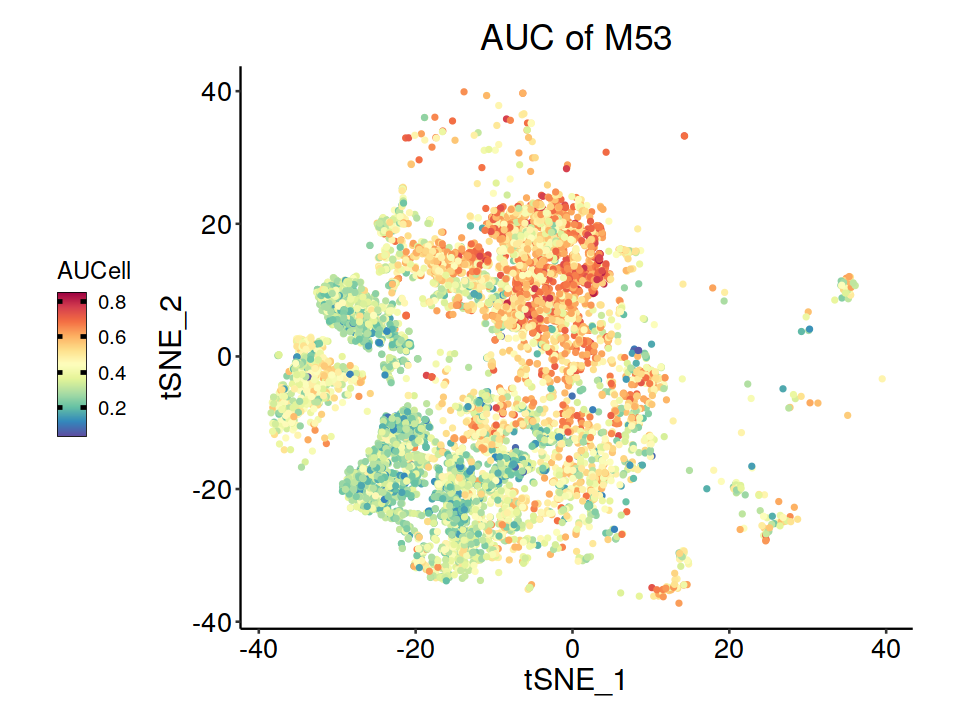

In [175]:
p5 <- ggplot2::ggplot(data.frame(OV_GSE165897_Stromal@meta.data, OV_GSE165897_Stromal@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = AUC), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "AUCell", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 0.8, 0.2), labels = c(0.0, 
                0.2, 0.4, 0.6,0.8)) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "AUC of M53") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p5

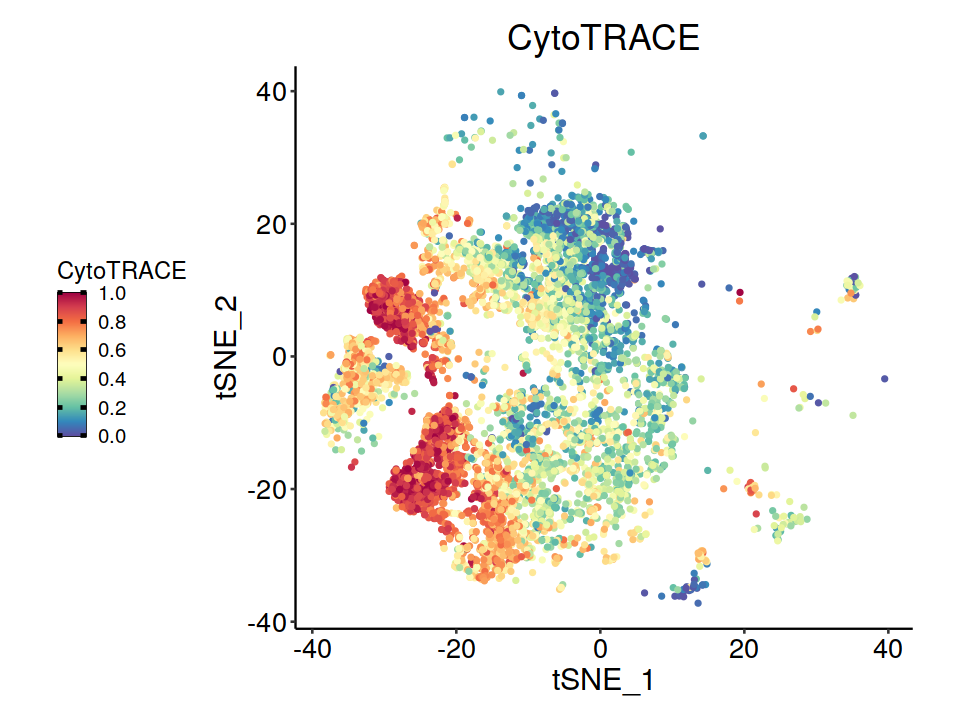

In [176]:
p6 <- ggplot2::ggplot(data.frame(OV_GSE165897_Stromal@meta.data, OV_GSE165897_Stromal@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = CytoTRACE), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "CytoTRACE", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 1, 0.2), labels = c("0.0", 
                0.2, 0.4, 0.6,0.8,'1.0')) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "CytoTRACE") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p6

In [178]:
head(OV_GSE165897_Stromal)

orig.ident nCount_RNA nFeature_RNA
AAACGGGTCATCTGCC-EOC443_iOme1 GSE165897  20303      3597        
AAAGTAGCAGACACTT-EOC443_iOme1 GSE165897   4482      1369        
AAAGTAGTCTACGAGT-EOC443_iOme1 GSE165897   4007      1508        
AAATGCCTCGCATGGC-EOC443_iOme1 GSE165897   9885      2066        
AACACGTCACATCCGG-EOC443_iOme1 GSE165897  14084      3132        
AACGTTGTCATGCATG-EOC443_iOme1 GSE165897  12087      3053        
AACTCCCTCAGCTTAG-EOC443_iOme1 GSE165897   8798      2731        
AACTCTTAGGTCGGAT-EOC443_iOme1 GSE165897   9314      2129        
AAGACCTAGCGTTTAC-EOC443_iOme1 GSE165897   6556      1573        
AAGGCAGAGTGTCTCA-EOC443_iOme1 GSE165897  11819      2691        
                              sample                  patient_id cellType_auto
AAACGGGTCATCTGCC-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AAAGTAGCAGACACTT-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AAAGTAGTCTACGAGT-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AAATGCCTCGCATGGC-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AACACGTCACATCCGG-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AACGTTGTCATGCATG-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AACTCCCTCAGCTTAG-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AACTCTTAGGTCGGAT-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AAGACCTAGCGTTTAC-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
AAGGCAGAGTGTCTCA-EOC443_iOme1 EOC443_interval_Omentum EOC443     fibo         
                              dataset   mitoRatio  log10GenesPerUMI
AAACGGGTCATCTGCC-EOC443_iOme1 GSE165897 0.04245678 0.8255115       
AAAGTAGCAGACACTT-EOC443_iOme1 GSE165897 0.03726015 0.8589422       
AAAGTAGTCTACGAGT-EOC443_iOme1 GSE165897 0.03668580 0.8821984       
AAATGCCTCGCATGGC-EOC443_iOme1 GSE165897 0.05746080 0.8298247       
AACACGTCACATCCGG-EOC443_iOme1 GSE165897 0.04430560 0.8426254       
AACGTTGTCATGCATG-EOC443_iOme1 GSE165897 0.02051791 0.8536146       
AACTCCCTCAGCTTAG-EOC443_iOme1 GSE165897 0.03273471 0.8711935       
AACTCTTAGGTCGGAT-EOC443_iOme1 GSE165897 0.05089113 0.8385138       
AAGACCTAGCGTTTAC-EOC443_iOme1 GSE165897 0.05399634 0.8375769       
AAGGCAGAGTGTCTCA-EOC443_iOme1 GSE165897 0.04729673 0.8421966       
                              riboRatio    integrated_snn_res.0.5
AAACGGGTCATCTGCC-EOC443_iOme1 0.0004245678 2                     
AAAGTAGCAGACACTT-EOC443_iOme1 0.0003726015 0                     
AAAGTAGTCTACGAGT-EOC443_iOme1 0.0003668580 2                     
AAATGCCTCGCATGGC-EOC443_iOme1 0.0005746080 2                     
AACACGTCACATCCGG-EOC443_iOme1 0.0004430560 0                     
AACGTTGTCATGCATG-EOC443_iOme1 0.0002051791 3                     
AACTCCCTCAGCTTAG-EOC443_iOme1 0.0003273471 2                     
AACTCTTAGGTCGGAT-EOC443_iOme1 0.0005089113 2                     
AAGACCTAGCGTTTAC-EOC443_iOme1 0.0005399634 2                     
AAGGCAGAGTGTCTCA-EOC443_iOme1 0.0004729673 2                     
                              seurat_clusters cellType integrated_snn_res.1
AAACGGGTCATCTGCC-EOC443_iOme1 9               CAF3     9                   
AAAGTAGCAGACACTT-EOC443_iOme1 1               CAF1     1                   
AAAGTAGTCTACGAGT-EOC443_iOme1 9               CAF3     9                   
AAATGCCTCGCATGGC-EOC443_iOme1 9               CAF3     9                   
AACACGTCACATCCGG-EOC443_iOme1 1               CAF1     1                   
AACGTTGTCATGCATG-EOC443_iOme1 10              CAF4     10                  
AACTCCCTCAGCTTAG-EOC443_iOme1 1               CAF3     1                   
AACTCTTAGGTCGGAT-EOC443_iOme1 9               CAF3     9                   
AAGACCTAGCGTTTAC-EOC443_iOme1 9               CAF3     9                   
AAGGCAGAGTGTCTCA-EOC443_iOme1 4               CAF3     4                   
                              AUC       CytoTRACE  M53      
AAACGGGTCATCTGCC-EOC443_iOme1 0.6832695 0.25045419 0.6832695
AAAGTAGCAGACAC

In [3]:
OV_GSE165897_Stromal$treatment_phase <- ifelse(grepl(pattern = 'primary',OV_GSE165897_Stromal$sample),'treatment-naive','post-NACT')

In [19]:
OV_GSE165897_Stromal$sample2 <- gsub(pattern = '_interval_.+',replacement = '-post',OV_GSE165897_Stromal$sample)
OV_GSE165897_Stromal$sample2 <- gsub(pattern = '_primary_.+',replacement = '-pre',OV_GSE165897_Stromal$sample2)

In [7]:
source('./code/function/0.functions.R')

In [20]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, length(unique(OV_GSE165897_Stromal@meta.data$cellType)))

In [46]:
cell.prop <- as.data.frame(prop.table(table(OV_GSE165897_Stromal$sample2,OV_GSE165897_Stromal$cellType))/rowSums(prop.table(table(OV_GSE165897_Stromal$sample2,OV_GSE165897_Stromal$cellType))))
colnames(cell.prop)<-c("sample","cellType","proportion")
head(cell.prop)

sample       cellType proportion
1 EOC1005-post CAF1     0.09359606
2 EOC1005-pre  CAF1     0.64888889
3 EOC136-post  CAF1     0.78865979
4 EOC136-pre   CAF1     0.90717300
5 EOC153-post  CAF1     0.02678571
6 EOC153-pre   CAF1     0.22133333

In [47]:
cell.prop$treatment_phase <- ifelse(grepl(pattern = 'post',cell.prop$sample),'post-NACT','treatment-naive')

In [23]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [41]:
cell.prop_list <- split(cell.prop,f = cell.prop$sample)

In [57]:
cell.prop_CAF3 <- subset(cell.prop,cellType=='CAF3')

In [58]:
cell.prop_CAF3 <- rbind(subset(cell.prop_CAF3,treatment_phase=='post-NACT'),subset(cell.prop_CAF3,treatment_phase=='treatment-naive'))
cell.prop_CAF3

sample       cellType proportion treatment_phase
45 EOC1005-post CAF3     0.89655172 post-NACT      
47 EOC136-post  CAF3     0.14690722 post-NACT      
49 EOC153-post  CAF3     0.90848214 post-NACT      
51 EOC227-post  CAF3     0.92000000 post-NACT      
53 EOC3-post    CAF3     0.53403141 post-NACT      
55 EOC349-post  CAF3     0.25000000 post-NACT      
57 EOC372-post  CAF3     0.06588235 post-NACT      
59 EOC443-post  CAF3     0.71836735 post-NACT      
61 EOC540-post  CAF3     0.85555556 post-NACT      
63 EOC733-post  CAF3     0.80000000 post-NACT      
65 EOC87-post   CAF3     0.76595745 post-NACT      
46 EOC1005-pre  CAF3     0.32000000 treatment-naive
48 EOC136-pre   CAF3     0.03375527 treatment-naive
50 EOC153-pre   CAF3     0.25066667 treatment-naive
52 EOC227-pre   CAF3     0.19230769 treatment-naive
54 EOC3-pre     CAF3     0.15755627 treatment-naive
56 EOC349-pre   CAF3     0.96231884 treatment-naive
58 EOC372-pre   CAF3     0.36690647 treatment-naive
60 EOC443-pre   CAF3     0.17705736 treatment-naive
62 EOC540-pre   CAF3     0.09604520 treatment-naive
64 EOC733-pre   CAF3     0.80000000 treatment-naive
66 EOC87-pre    CAF3     0.27310924 treatment-naive

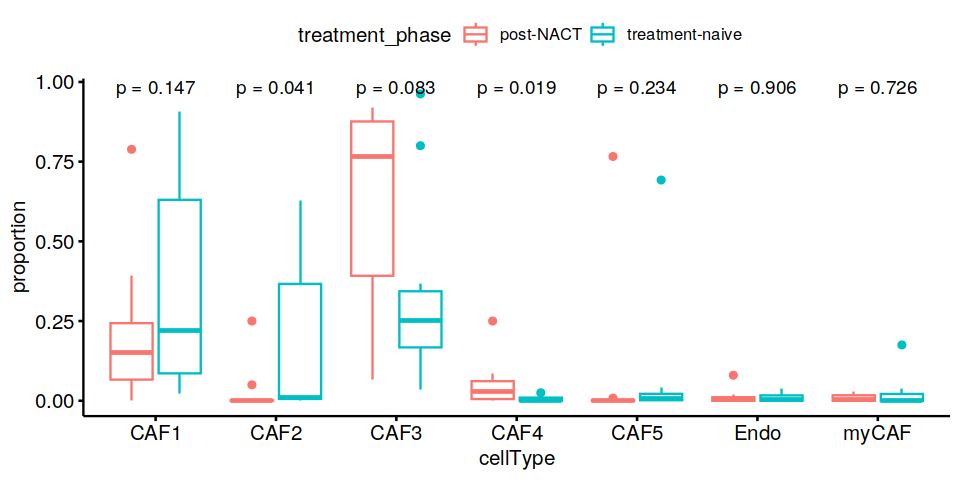

In [64]:
options(repr.plot.height = 4, repr.plot.width = 8)
ggboxplot(cell.prop,x = 'cellType',y = 'proportion',color = 'treatment_phase')+stat_compare_means(aes(group = treatment_phase),data = cell.prop,paired =T,label =  "p.format", label.x = 1.5)


In [65]:
pdf(file = './output/bulk/section_5/3.CellType_postVSpre_proportion.pdf',width = 8,height = 4)
ggboxplot(cell.prop,x = 'cellType',y = 'proportion',color = 'treatment_phase')+stat_compare_means(aes(group = treatment_phase),data = cell.prop,paired =T,label =  "p.format", label.x = 1.5)
dev.off()

png 
  2

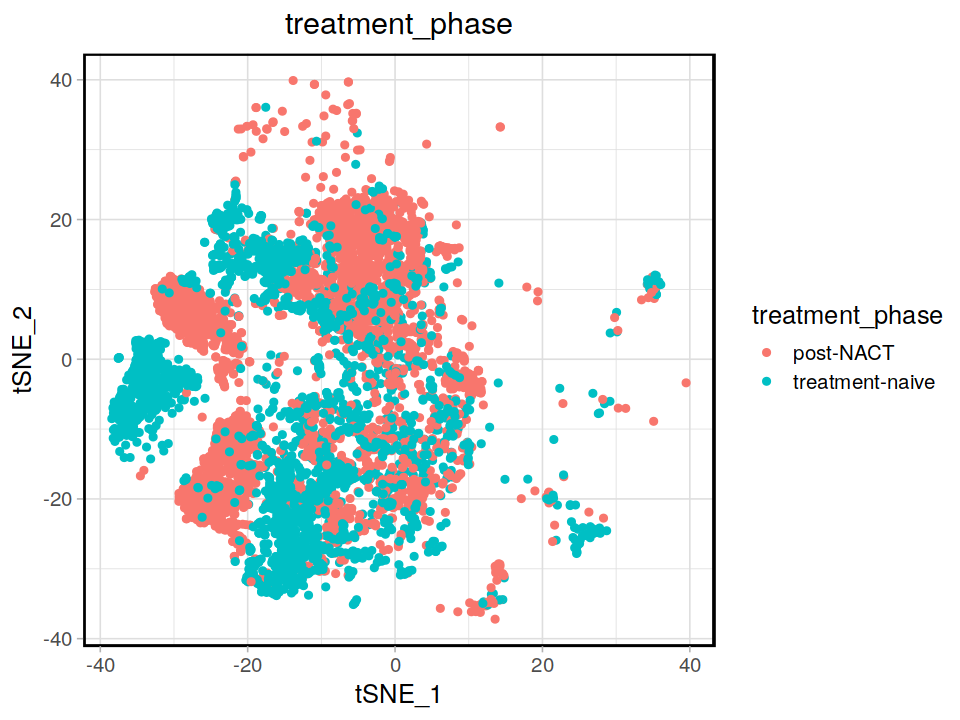

In [180]:
p7 <- ggplot(data.frame(OV_GSE165897_Stromal@meta.data, OV_GSE165897_Stromal@reductions$tsne@cell.embeddings), aes(tSNE_1, tSNE_2, color=treatment_phase)) + 
geom_point( size=1.5) + 
theme_light(base_size = 15)+
labs(title = "treatment_phase")+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  theme(plot.title = element_text(hjust = 0.5))
p7

In [181]:
OV_GSE165897_Stromal$M53 <- OV_GSE165897_Stromal$AUC

`geom_smooth()` using formula = 'y ~ x'


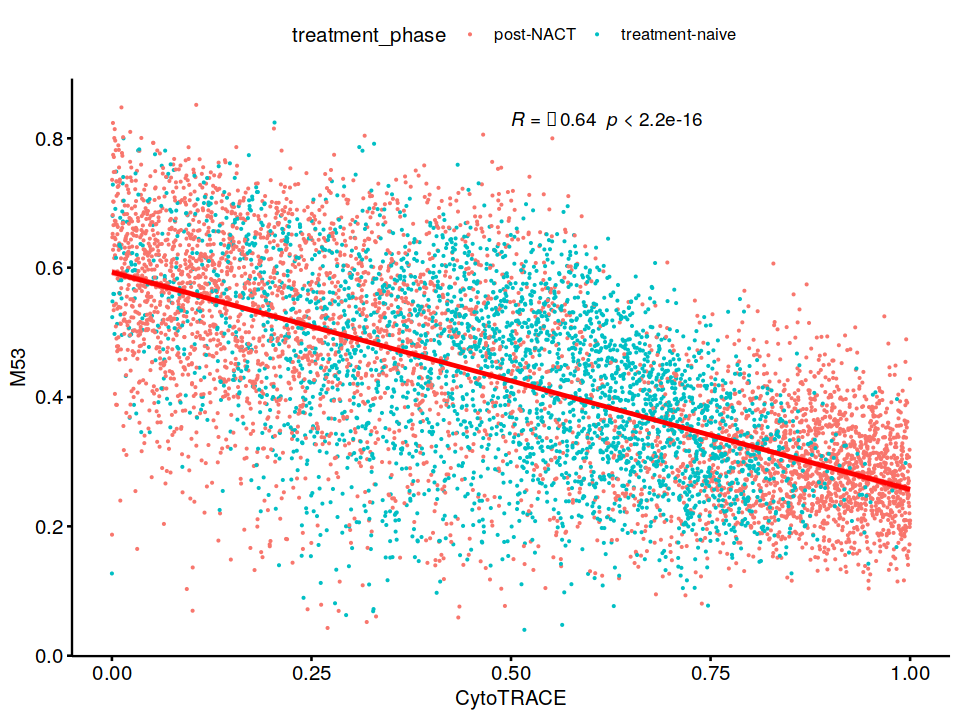

In [182]:
p8 <- ggscatter(data = OV_GSE165897_Stromal@meta.data,x = 'CytoTRACE',y = 'M53',color = 'treatment_phase',size = 0.1,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.x = 0.5, label.sep = "\\n"))
p8

In [18]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




In [185]:
pdf(file = './output/bulk/section_5/3.CytoTRACEvsM53_plot.pdf',width = 6,height = 5)
print(p4)
print(p5)
print(p6)
print(p7)
print(p8)
dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”


png 
  2

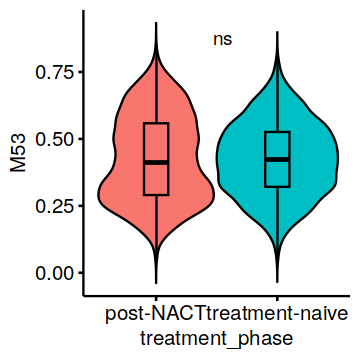

In [187]:
options(repr.plot.height = 3, repr.plot.width = 3)
p9 <- ggviolin(data = OV_GSE165897_Stromal@meta.data,x = 'treatment_phase',y = 'M53',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p9

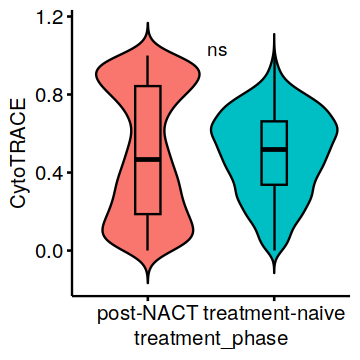

In [188]:
options(repr.plot.height = 3, repr.plot.width = 3)
p10 <- ggviolin(data = OV_GSE165897_Stromal@meta.data,x = 'treatment_phase',y = 'CytoTRACE',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p10

In [47]:
library(ggplot2)
library(ggsci)
library(ggpubr)
library(scales)
library(ggunchained) 
mytheme <- theme(axis.text.x=element_text(size=12), 
                 axis.text.y=element_text(size=12), 
                 axis.title=element_text(size = 13), 
                 legend.text=element_text(size=12),
                 legend.title=element_text(size=12),
                 axis.line = element_line(size=0.7), 
                 panel.border = element_blank(),
                 panel.grid = element_blank())

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


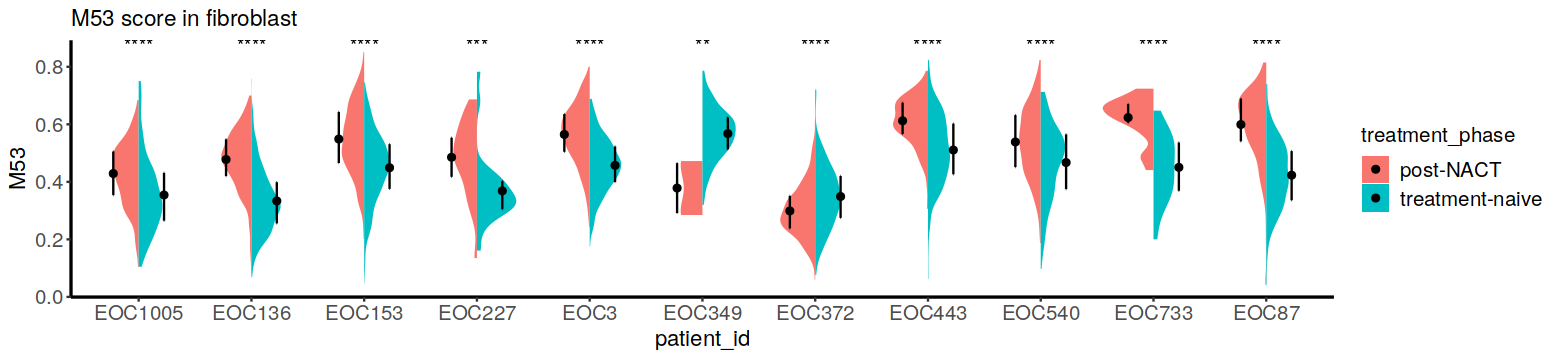

In [190]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot1 <- ggplot(OV_GSE165897_Stromal@meta.data,aes(x=patient_id,y = M53,fill=treatment_phase))+
 ggtitle('M53 score in fibroblast') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_Stromal@meta.data,label =  "p.signif", label.x = 1.5)
vplot1

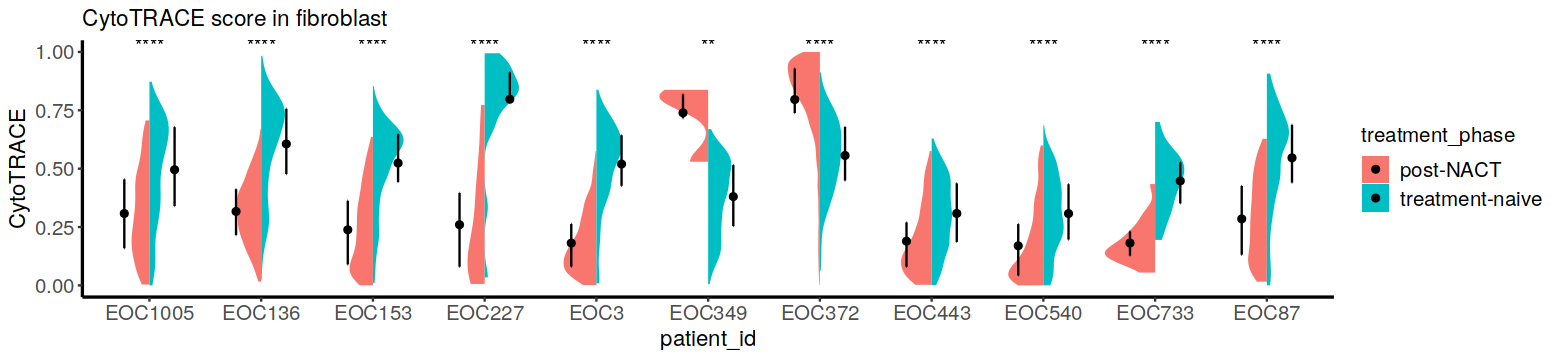

In [191]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot2 <- ggplot(OV_GSE165897_Stromal@meta.data,aes(x=patient_id,y = CytoTRACE,fill=treatment_phase))+
 ggtitle('CytoTRACE score in fibroblast') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_Stromal@meta.data,label =  "p.signif", label.x = 1.5)
vplot2

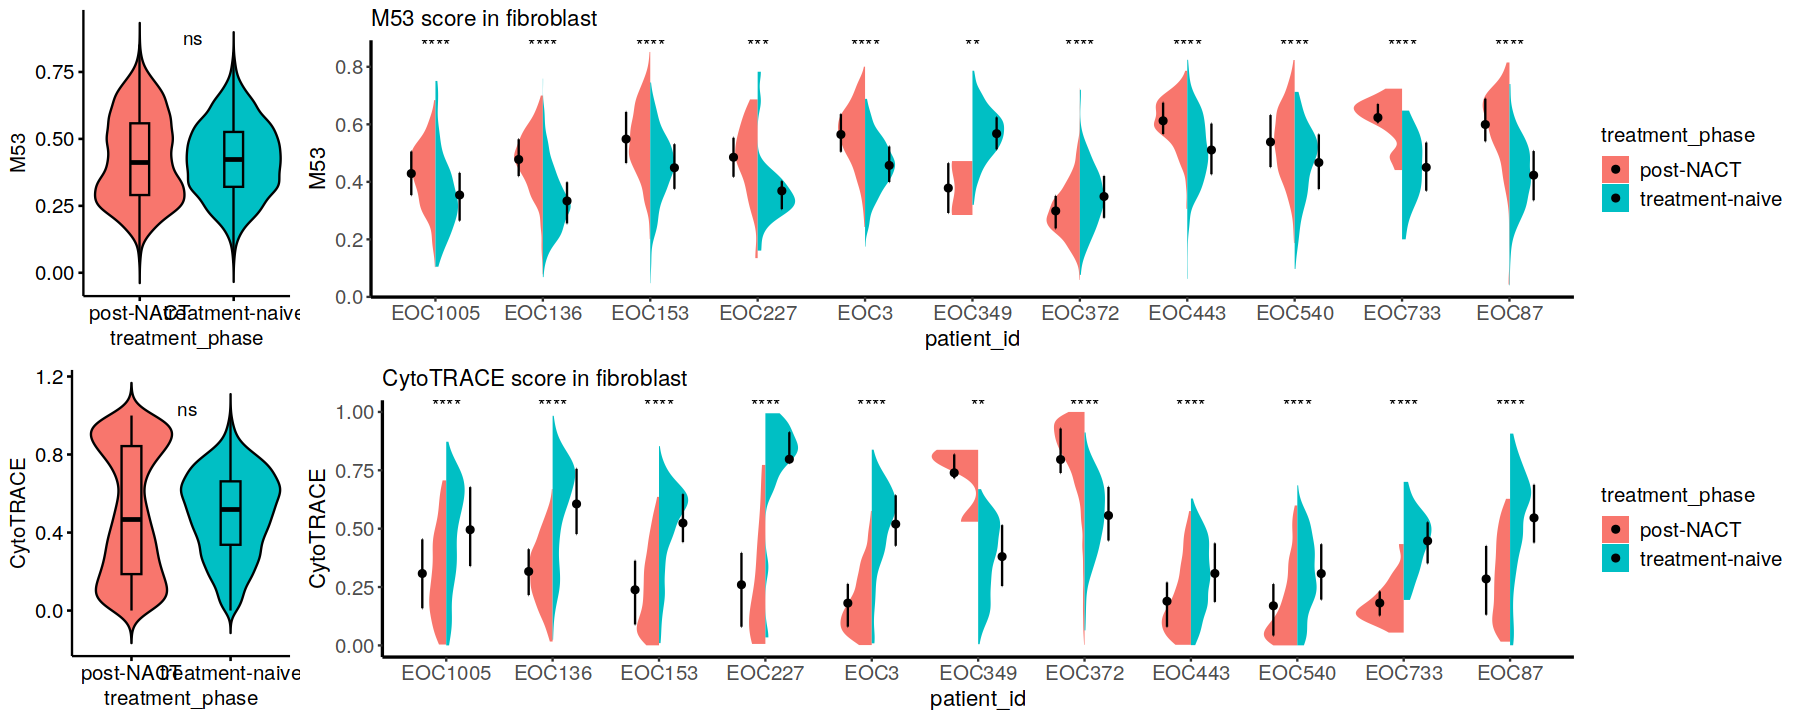

In [192]:
options(repr.plot.height = 6, repr.plot.width = 15)
grid.arrange(p9,vplot1,p10,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))

In [193]:
pdf(file = './output/bulk/section_5/3.NACT_preVSpost_CytoTRACE_M53_boxplot_CAF.pdf',width = 15,height = 6)
grid.arrange(p9,vplot1,p10,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))
dev.off()

png 
  2

## 3.Running CytoTRACE for myeloid cells

In [160]:
OV_GSE165897_Marc <- readRDS(file='./output/1.sangleCell_pre/OV_GSE165897_Marc.RDS')
results3 <- readRDS(file='./output/1.sangleCell_pre/CytoTRACE_Marc_results.RDS')

In [194]:
OV_GSE165897_Marc$M53 <- OV_GSE165897_Marc$AUC

In [195]:
OV_GSE165897_Marc$CytoTRACE <- results3$CytoTRACE
head(OV_GSE165897_Marc)

orig.ident nCount_RNA nFeature_RNA
AAACGGGCACATGGGA-EOC443_iOme1 GSE165897  13046      2348        
AAAGCAAAGATGTAAC-EOC443_iOme1 GSE165897  11739      2185        
AAAGCAATCAGGCGAA-EOC443_iOme1 GSE165897   2315       804        
AAAGTAGTCTGCGGCA-EOC443_iOme1 GSE165897   4643      1292        
AAATGCCCAAGCCGTC-EOC443_iOme1 GSE165897  13426      2439        
AAATGCCCACACATGT-EOC443_iOme1 GSE165897  19036      3262        
AACCATGCAAGGTTTC-EOC443_iOme1 GSE165897  11296      2299        
AACGTTGGTCTAGTGT-EOC443_iOme1 GSE165897  16401      2689        
AAGGCAGAGCTAGTTC-EOC443_iOme1 GSE165897   2530       884        
AAGGCAGCACAGACTT-EOC443_iOme1 GSE165897   8570      2126        
                              sample                  patient_id cellType_auto
AAACGGGCACATGGGA-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAAGCAAAGATGTAAC-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAAGCAATCAGGCGAA-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAAGTAGTCTGCGGCA-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAATGCCCAAGCCGTC-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAATGCCCACACATGT-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AACCATGCAAGGTTTC-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AACGTTGGTCTAGTGT-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAGGCAGAGCTAGTTC-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
AAGGCAGCACAGACTT-EOC443_iOme1 EOC443_interval_Omentum EOC443     myeloid      
                              dataset   mitoRatio  log10GenesPerUMI
AAACGGGCACATGGGA-EOC443_iOme1 GSE165897 0.06032500 0.8190297       
AAAGCAAAGATGTAAC-EOC443_iOme1 GSE165897 0.06559332 0.8205784       
AAAGCAATCAGGCGAA-EOC443_iOme1 GSE165897 0.06393089 0.8634900       
AAAGTAGTCTGCGGCA-EOC443_iOme1 GSE165897 0.04802929 0.8484956       
AAATGCCCAAGCCGTC-EOC443_iOme1 GSE165897 0.04953076 0.8205561       
AAATGCCCACACATGT-EOC443_iOme1 GSE165897 0.03903131 0.8209889       
AACCATGCAAGGTTTC-EOC443_iOme1 GSE165897 0.06170326 0.8294107       
AACGTTGGTCTAGTGT-EOC443_iOme1 GSE165897 0.03768063 0.8136883       
AAGGCAGAGCTAGTTC-EOC443_iOme1 GSE165897 0.04505929 0.8658090       
AAGGCAGCACAGACTT-EOC443_iOme1 GSE165897 0.05355893 0.8460665       
                              riboRatio    RNA_snn_res.1 seurat_clusters
AAACGGGCACATGGGA-EOC443_iOme1 0.0006032500 0             0              
AAAGCAAAGATGTAAC-EOC443_iOme1 0.0006559332 0             0              
AAAGCAATCAGGCGAA-EOC443_iOme1 0.0006393089 4             4              
AAAGTAGTCTGCGGCA-EOC443_iOme1 0.0004802929 4             4              
AAATGCCCAAGCCGTC-EOC443_iOme1 0.0004953076 17            17             
AAATGCCCACACATGT-EOC443_iOme1 0.0003903131 0             0              
AACCATGCAAGGTTTC-EOC443_iOme1 0.0006170326 0             0              
AACGTTGGTCTAGTGT-EOC443_iOme1 0.0003768063 2             2              
AAGGCAGAGCTAGTTC-EOC443_iOme1 0.0004505929 2             2              
AAGGCAGCACAGACTT-EOC443_iOme1 0.0005355893 2             2              
                              cellType     AUC       M53       CytoTRACE
AAACGGGCACATGGGA-EOC443_iOme1 Macro_C1QB   0.5449987 0.5449987 0.6880208
AAAGCAAAGATGTAAC-EOC443_iOme1 Macro_C1QB   0.5388239 0.5388239 0.8916667
AAAGCAATCAGGCGAA-EOC443_iOme1 Mono_FCN1    0.1295945 0.1295945 0.5074653
AAAGTAGTCTGCGGCA-EOC443_iOme1 Mono_FCN1    0.3219445 0.3219445 0.9500000
AAATGCCCAAGCCGTC-EOC443_iOme1 Macro_CCL3L3 0.5218051 0.5218051 0.8440972
AAATGCCCACACATGT-EOC443_iOme1 Macro_C1QB   0.5644135 0.5644135 0.8819444
AACCATGCAAGGTTTC-EOC443_iOme1 Macro_C1QB   0.5280268 0.5280268 0.6788194
AACGTTGGTCTAGTGT-EOC443_iOme1 Macro_CCL3L3 0.6206076 0.6206076 0.8904514
AAGGCAGAGCTAGTTC-EOC443_iOme1 Macro_CCL3L3 0.4826122 0.4826122 0.1394097
AAGGCAGCACAGACTT-EOC443_iOme1 Macro_CCL3L3 0.5715374 0.5715374 0.6550347

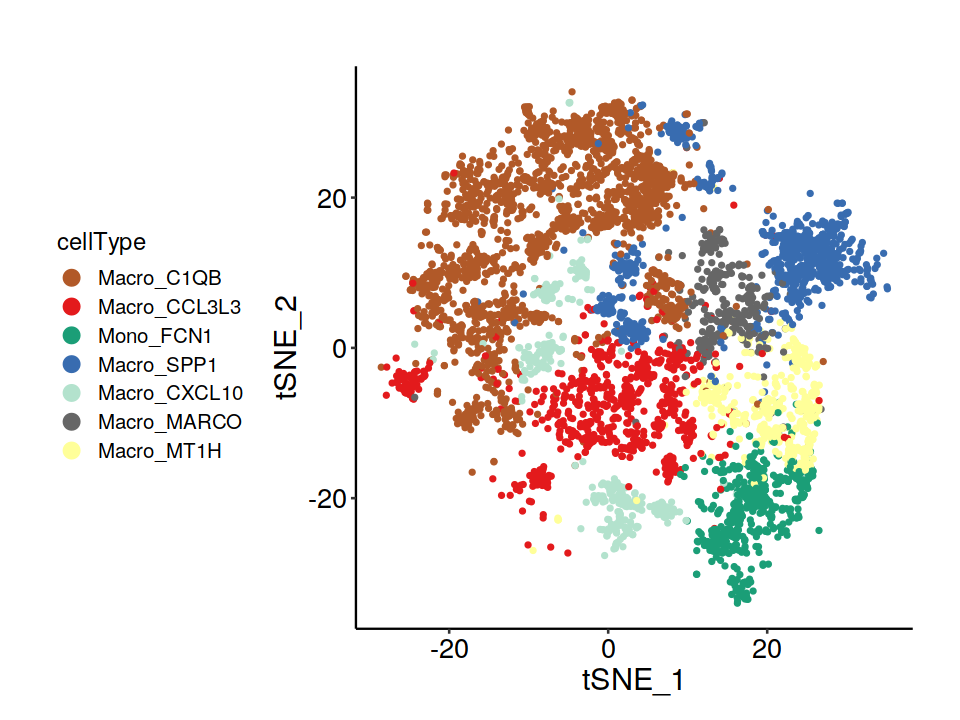

In [198]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, length(unique(OV_GSE165897_Marc@meta.data$cellType)))

p24 <- ggplot2::ggplot(data.frame(OV_GSE165897_Marc@meta.data, OV_GSE165897_Marc@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = cellType), 
            size = 1) + ggplot2::scale_colour_manual(values = cellType_col, 
                guide = ggplot2::guide_legend(frame.colour = "black", 
                  override.aes = list(size = 4))) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p24

In [24]:
temp <- RColorBrewer::brewer.pal(11, "Spectral")
rbPal <- colorRampPalette(temp)

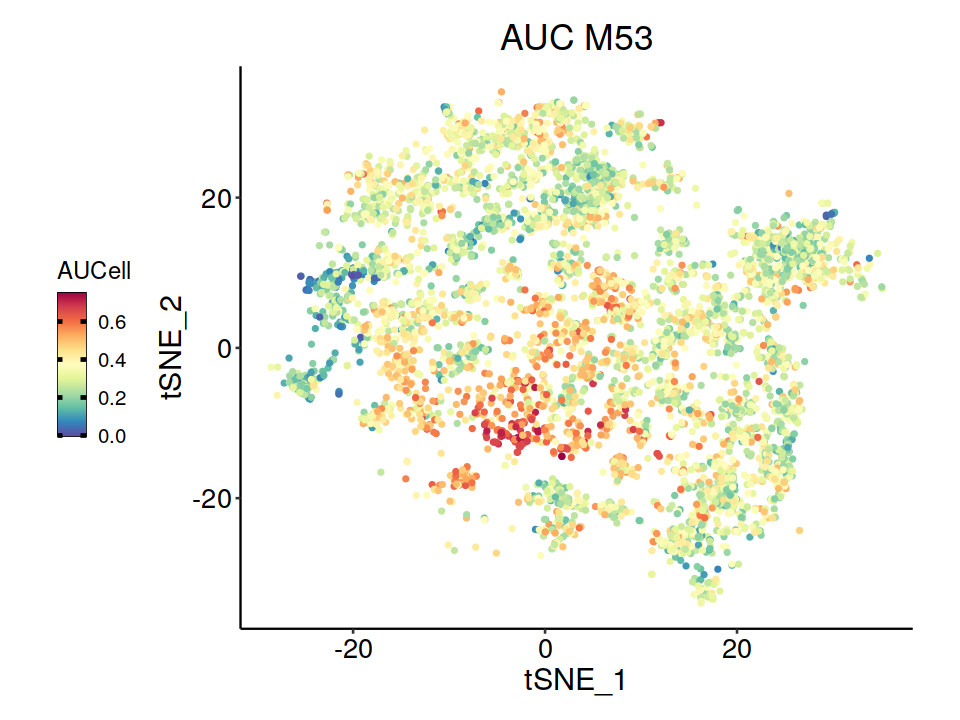

In [199]:
p25 <- ggplot2::ggplot(data.frame(OV_GSE165897_Marc@meta.data, OV_GSE165897_Marc@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = AUC), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "AUCell", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 0.6, 0.2), labels = c("0.0", 
                0.2, 0.4, 0.6)) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "AUC M53") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p25

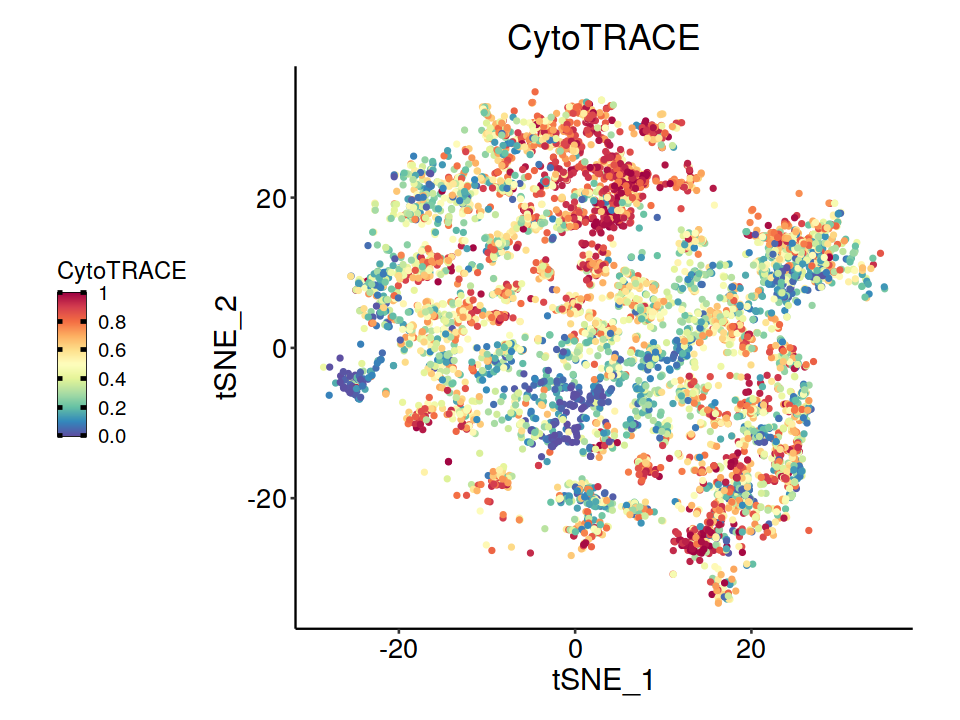

In [201]:
p26 <- ggplot2::ggplot(data.frame(OV_GSE165897_Marc@meta.data, OV_GSE165897_Marc@reductions$tsne@cell.embeddings), ggplot2::aes(x = tSNE_1, 
            y = tSNE_2)) + ggplot2::geom_point(ggplot2::aes(colour = CytoTRACE), 
            size = 1) + ggplot2::scale_colour_gradientn(name = "CytoTRACE", 
            colours = rev(rbPal(50)), guide = ggplot2::guide_colourbar(ticks.colour = "black", 
                ticks.linewidth = 1, frame.colour = "black"), 
            breaks = seq(0, 1, 0.2), labels = c("0.0", 
                0.2, 0.4, 0.6,0.8,1.0)) + ggplot2::labs(x = 'tSNE_1', 
            y = 'tSNE_2', title = "CytoTRACE") + ggpubr::theme_pubr() + 
            ggplot2::theme(legend.text = ggplot2::element_text(size = 12), 
                legend.title = ggplot2::element_text(size = 14), 
                plot.title = ggplot2::element_text(size = 21, 
                  hjust = 0.5), axis.title.x = ggplot2::element_text(size = 18), 
                axis.title.y = ggplot2::element_text(size = 18), 
                axis.text = ggplot2::element_text(size = 16), 
                legend.position = "left", plot.margin = ggplot2::unit(c(0.5, 
                  1, 0.5, 1), "cm"))
options(repr.plot.height = 6, repr.plot.width = 8)
p26

In [202]:
OV_GSE165897_Marc$treatment_phase <- ifelse(grepl(pattern = 'primary',OV_GSE165897_Marc$sample),'treatment-naive','post-NACT')

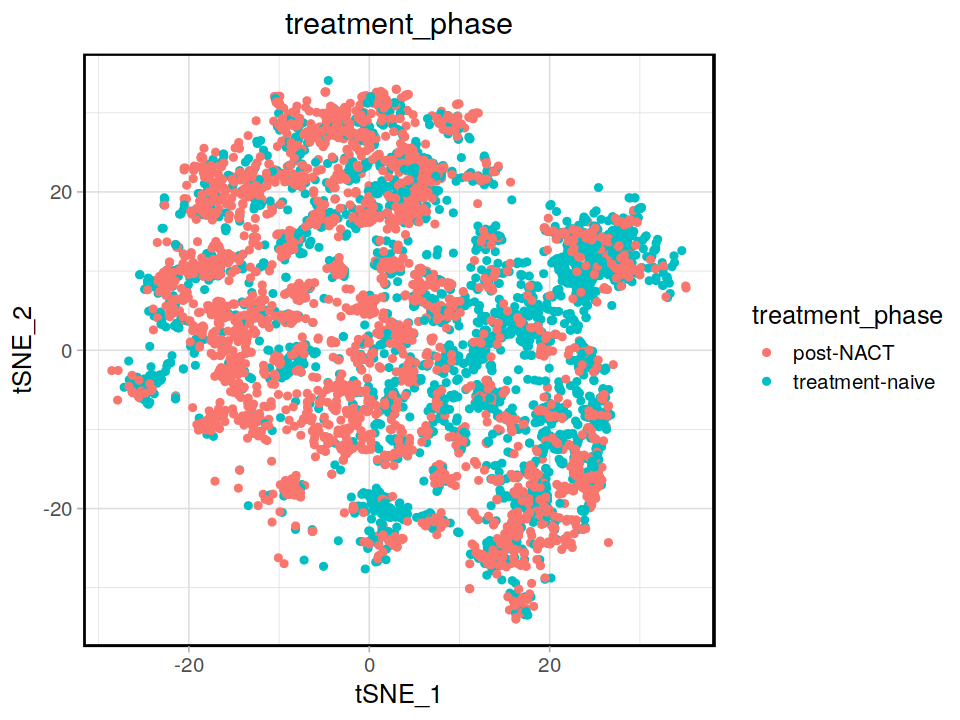

In [209]:
p27 <- ggplot(data.frame(OV_GSE165897_Marc@meta.data, OV_GSE165897_Marc@reductions$tsne@cell.embeddings), aes(tSNE_1, tSNE_2, color=treatment_phase)) + 
geom_point( size=1.5) + 
theme_light(base_size = 15)+
labs(title = "treatment_phase")+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  theme(plot.title = element_text(hjust = 0.5))
options(repr.plot.height = 6, repr.plot.width = 8)
p27

`geom_smooth()` using formula = 'y ~ x'


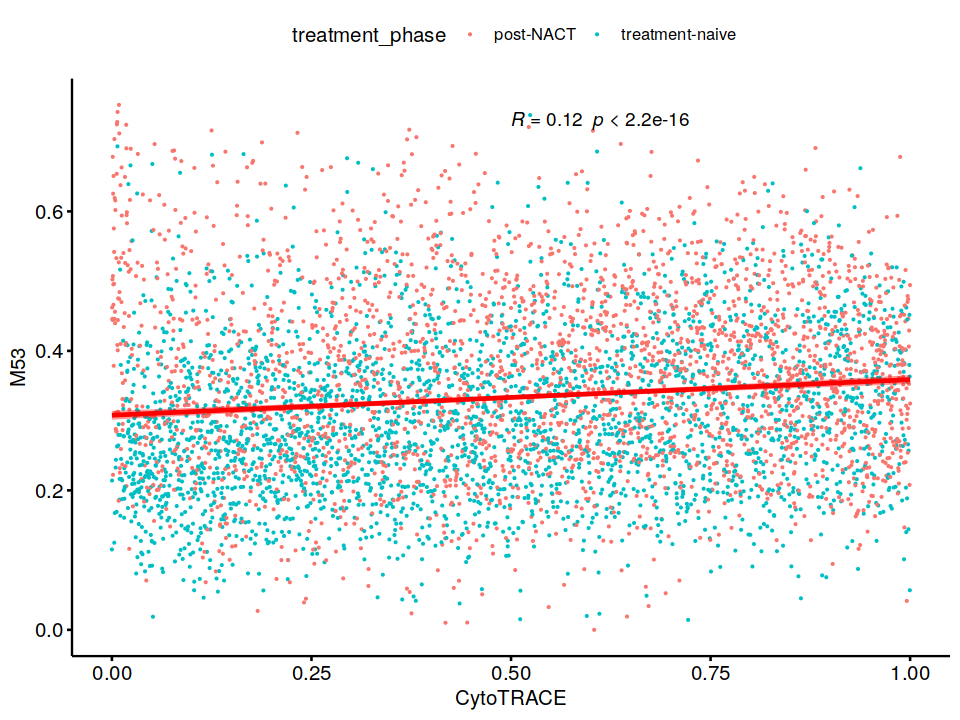

In [211]:
p28 <- ggscatter(data = OV_GSE165897_Marc@meta.data,x = 'CytoTRACE',y = 'M53',color = 'treatment_phase',size = 0.1,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.x = 0.5, label.sep = "\\n"))
p28

In [212]:
pdf(file = './output/bulk/section_5/3.CytoTRACEvsM53_TAM_plot.pdf',width = 6,height = 5)
print(p24)
print(p25)
print(p26)
print(p27)
print(p28)
dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”


png 
  2

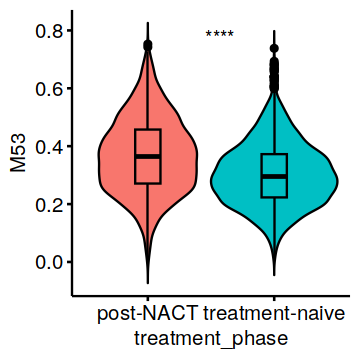

In [203]:
options(repr.plot.height = 3, repr.plot.width = 3)
p11 <- ggviolin(data = OV_GSE165897_Marc@meta.data,x = 'treatment_phase',y = 'M53',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p11

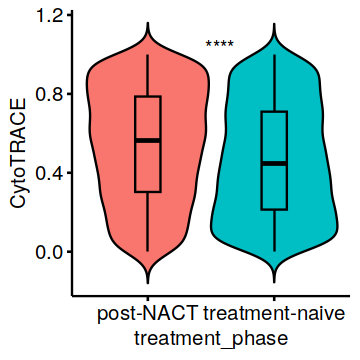

In [204]:
options(repr.plot.height = 3, repr.plot.width = 3)
p12 <- ggviolin(data = OV_GSE165897_Marc@meta.data,x = 'treatment_phase',y = 'CytoTRACE',fill = 'treatment_phase',add = 'boxplot')+stat_compare_means(label =  "p.signif", label.x = 1.5)+
theme(legend.position = 'none')
p12

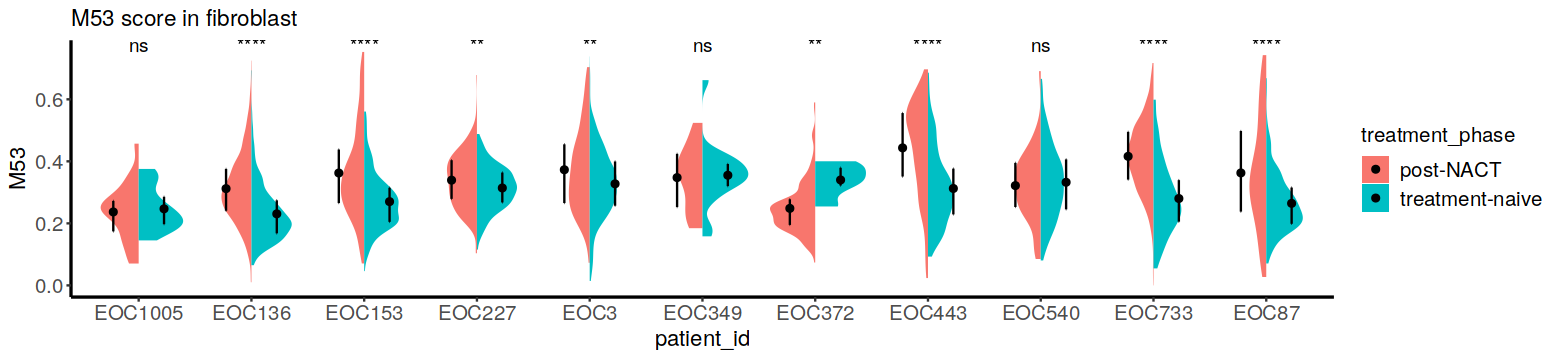

In [205]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot1 <- ggplot(OV_GSE165897_Marc@meta.data,aes(x=patient_id,y = M53,fill=treatment_phase))+
 ggtitle('M53 score in fibroblast') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_Marc@meta.data,label =  "p.signif", label.x = 1.5)
vplot1

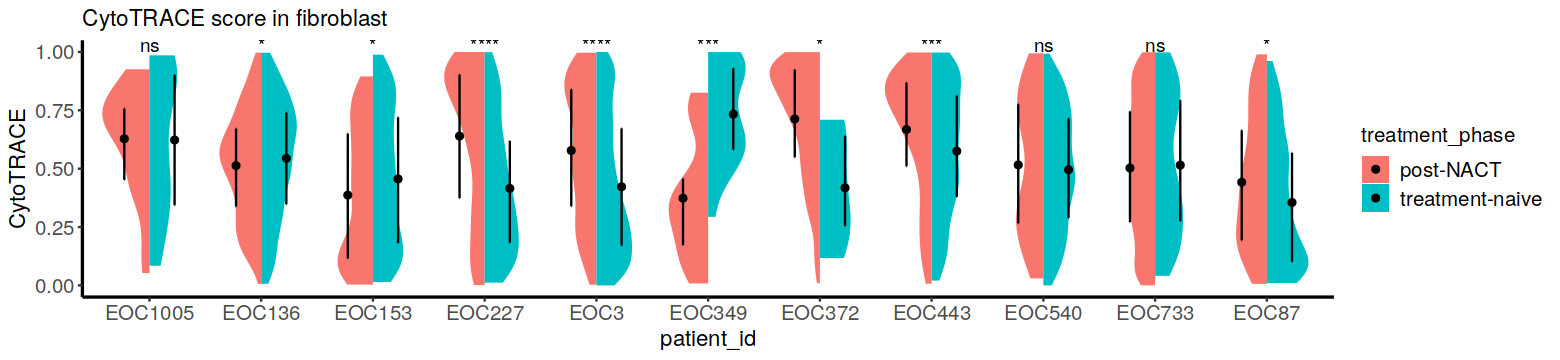

In [206]:
options(repr.plot.height = 3, repr.plot.width = 13)
vplot2 <- ggplot(OV_GSE165897_Marc@meta.data,aes(x=patient_id,y = CytoTRACE,fill=treatment_phase))+
 ggtitle('CytoTRACE score in fibroblast') + 
  geom_split_violin(trim = T,colour=NA)+
  geom_point(stat = 'summary',fun=mean,
             position = position_dodge(width = 0.9))+
  stat_summary(fun.min = function(x){quantile(x)[2]},
               fun.max = function(x){quantile(x)[4]},
               geom = 'errorbar',color='black',
               width=0.01,size=0.5,
               position = position_dodge(width = 0.9))+
  theme_bw()+
  mytheme+
stat_compare_means(aes(group = treatment_phase),data = OV_GSE165897_Marc@meta.data,label =  "p.signif", label.x = 1.5)
vplot2

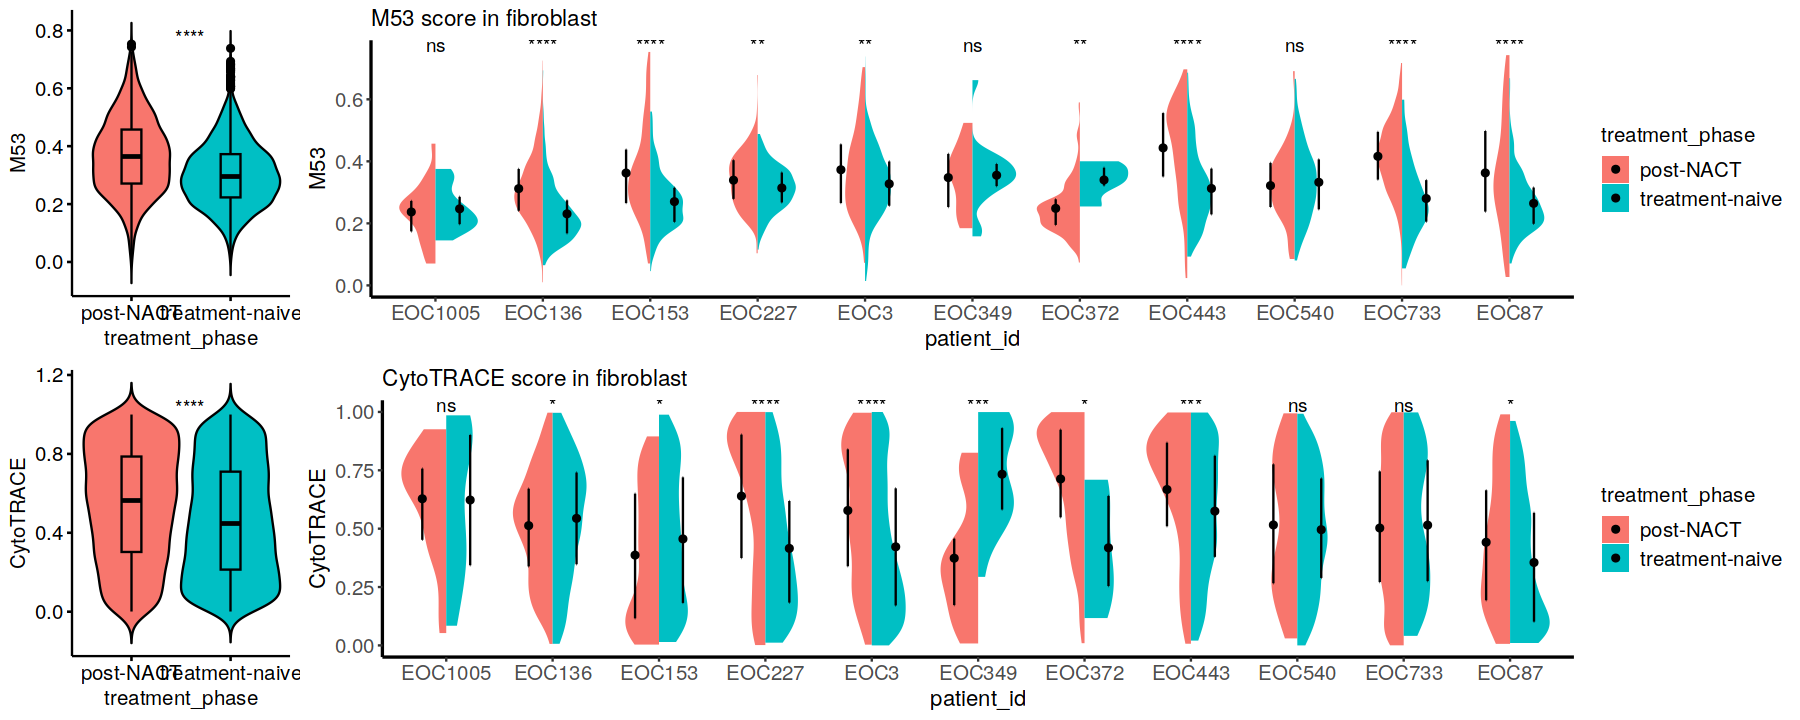

In [207]:
options(repr.plot.height = 6, repr.plot.width = 15)
grid.arrange(p11,vplot1,p12,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))

In [154]:
pdf(file = './output/bulk/section_5/3.NACT_preVSpost_CytoTRACE_M53_boxplot_TAM.pdf',width = 15,height = 6)
grid.arrange(p11,vplot1,p12,vplot2,layout_matrix=matrix(c(1,rep(2,5),3,rep(4,5)),byrow = T,nrow = 2))
dev.off()

png 
  2

In [12]:
head(OV_GSE165897_Marc)

orig.ident nCount_RNA nFeature_RNA
AAACGGGCACATGGGA-EOC443_iOme1_3 GSE165897  13046      2348        
AAAGCAAAGATGTAAC-EOC443_iOme1_3 GSE165897  11739      2185        
AAAGCAATCAGGCGAA-EOC443_iOme1_3 GSE165897   2315       804        
AAAGTAGTCTGCGGCA-EOC443_iOme1_3 GSE165897   4643      1292        
AAATGCCCAAGCCGTC-EOC443_iOme1_3 GSE165897  13426      2439        
AAATGCCCACACATGT-EOC443_iOme1_3 GSE165897  19036      3262        
AACCATGCAAGGTTTC-EOC443_iOme1_3 GSE165897  11296      2299        
AACGTTGGTCTAGTGT-EOC443_iOme1_3 GSE165897  16401      2689        
AAGGCAGAGCTAGTTC-EOC443_iOme1_3 GSE165897   2530       884        
AAGGCAGCACAGACTT-EOC443_iOme1_3 GSE165897   8570      2126        
                                sample                  patient_id
AAACGGGCACATGGGA-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAAGCAAAGATGTAAC-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAAGCAATCAGGCGAA-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAAGTAGTCTGCGGCA-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAATGCCCAAGCCGTC-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAATGCCCACACATGT-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AACCATGCAAGGTTTC-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AACGTTGGTCTAGTGT-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAGGCAGAGCTAGTTC-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
AAGGCAGCACAGACTT-EOC443_iOme1_3 EOC443_interval_Omentum EOC443    
                                cellType_auto dataset   mitoRatio 
AAACGGGCACATGGGA-EOC443_iOme1_3 Myeloid       GSE165897 0.06032500
AAAGCAAAGATGTAAC-EOC443_iOme1_3 Myeloid       GSE165897 0.06559332
AAAGCAATCAGGCGAA-EOC443_iOme1_3 Myeloid       GSE165897 0.06393089
AAAGTAGTCTGCGGCA-EOC443_iOme1_3 Myeloid       GSE165897 0.04802929
AAATGCCCAAGCCGTC-EOC443_iOme1_3 Myeloid       GSE165897 0.04953076
AAATGCCCACACATGT-EOC443_iOme1_3 Myeloid       GSE165897 0.03903131
AACCATGCAAGGTTTC-EOC443_iOme1_3 Myeloid       GSE165897 0.06170326
AACGTTGGTCTAGTGT-EOC443_iOme1_3 Myeloid       GSE165897 0.03768063
AAGGCAGAGCTAGTTC-EOC443_iOme1_3 Myeloid       GSE165897 0.04505929
AAGGCAGCACAGACTT-EOC443_iOme1_3 Myeloid       GSE165897 0.05355893
                                log10GenesPerUMI riboRatio    ⋯ cellType    
AAACGGGCACATGGGA-EOC443_iOme1_3 0.8190297        0.0006032500 ⋯ Macro_C1QB  
AAAGCAAAGATGTAAC-EOC443_iOme1_3 0.8205784        0.0006559332 ⋯ Macro_C1QB  
AAAGCAATCAGGCGAA-EOC443_iOme1_3 0.8634900        0.0006393089 ⋯ Mono_FCN1   
AAAGTAGTCTGCGGCA-EOC443_iOme1_3 0.8484956        0.0004802929 ⋯ Mono_FCN1   
AAATGCCCAAGCCGTC-EOC443_iOme1_3 0.8205561        0.0004953076 ⋯ Macro_CCL3L3
AAATGCCCACACATGT-EOC443_iOme1_3 0.8209889        0.0003903131 ⋯ Macro_C1QB  
AACCATGCAAGGTTTC-EOC443_iOme1_3 0.8294107        0.0006170326 ⋯ Macro_C1QB  
AACGTTGGTCTAGTGT-EOC443_iOme1_3 0.8136883        0.0003768063 ⋯ Macro_CCL3L3
AAGGCAGAGCTAGTTC-EOC443_iOme1_3 0.8658090        0.0004505929 ⋯ Macro_CCL3L3
AAGGCAGCACAGACTT-EOC443_iOme1_3 0.8460665        0.0005355893 ⋯ Macro_CCL3L3
                                RNA_snn_res.0.5 integrated_snn_res.0.5
AAACGGGCACATGGGA-EOC443_iOme1_3 2               NA                    
AAAGCAAAGATGTAAC-EOC443_iOme1_3 2               NA                    
AAAGCAATCAGGCGAA-EOC443_iOme1_3 5               NA                    
AAAGTAGTCTGCGGCA-EOC443_iOme1_3 5               NA                    
AAATGCCCAAGCCGTC-EOC443_iOme1_3 5               NA                    
AAATGCCCACACATGT-EOC443_iOme1_3 2               NA                    
AACCATGCAAGGTTTC-EOC443_iOme1_3 2               NA                    
AACGTTGGTCTAGTGT-EOC443_iOme1_3 5               NA                    
AAGGCAGAGCTAGTTC-EOC443_iOme1_3 2               NA                    
AAGGCAGCACAGACTT-EOC443_iOme1_3 2               NA                    
                                cellType_rough nCount_integrated
AAACGGGCACATGGGA-EOC443_iOme1_3 myeloid        0                
AAAGCAAAGATGTAAC-EOC443_iOme1_3 myeloid        0               

In [213]:
head(OV_GSE165897_EOC)

orig.ident nCount_RNA nFeature_RNA
AAACCTGCAGGTTTCA-EOC372_pPer GSE165897  33534      5700        
AAACCTGGTCCGAATT-EOC372_pPer GSE165897  17828      3196        
AAAGATGCATCTGGTA-EOC372_pPer GSE165897   9999      2148        
AAAGTAGTCGCTTAGA-EOC372_pPer GSE165897  17819      3438        
AAATGCCAGGTGCACA-EOC372_pPer GSE165897  11506      2839        
AAATGCCAGTACGATA-EOC372_pPer GSE165897   5553      1773        
AACCATGCACGTTGGC-EOC372_pPer GSE165897  46567      6572        
AACTCAGGTACATCCA-EOC372_pPer GSE165897  18190      3919        
AACTCCCGTAAACACA-EOC372_pPer GSE165897  17146      3775        
AACTCCCTCCAAAGTC-EOC372_pPer GSE165897  31602      4939        
                             sample                    patient_id cellType_auto
AAACCTGCAGGTTTCA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAACCTGGTCCGAATT-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAAGATGCATCTGGTA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAAGTAGTCGCTTAGA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAATGCCAGGTGCACA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AAATGCCAGTACGATA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACCATGCACGTTGGC-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCAGGTACATCCA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCCCGTAAACACA-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
AACTCCCTCCAAAGTC-EOC372_pPer EOC372_primary_Peritoneum EOC372     Epi          
                             dataset mitoRatio    log10GenesPerUMI riboRatio   
AAACCTGCAGGTTTCA-EOC372_pPer NA      0.0456253355 0.8299386        4.562534e-04
AAACCTGGTCCGAATT-EOC372_pPer NA      0.1165021315 0.8243995        1.165021e-03
AAAGATGCATCTGGTA-EOC372_pPer NA      0.1033103310 0.8330176        1.033103e-03
AAAGTAGTCGCTTAGA-EOC372_pPer NA      0.0946181043 0.8318991        9.461810e-04
AAATGCCAGGTGCACA-EOC372_pPer NA      0.1008169651 0.8503397        1.008170e-03
AAATGCCAGTACGATA-EOC372_pPer NA      0.0001800828 0.8675884        1.800828e-06
AACCATGCACGTTGGC-EOC372_pPer NA      0.1180879163 0.8178307        1.180879e-03
AACTCAGGTACATCCA-EOC372_pPer NA      0.0472237493 0.8435015        4.722375e-04
AACTCCCGTAAACACA-EOC372_pPer NA      0.0811851161 0.8447755        8.118512e-04
AACTCCCTCCAAAGTC-EOC372_pPer NA      0.1013227011 0.8208607        1.013227e-03
                             ⋯ cellType RNA_snn_res.0.5 integrated_snn_res.0.5
AAACCTGCAGGTTTCA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AAACCTGGTCCGAATT-EOC372_pPer ⋯ Epi-pre  17              NA                    
AAAGATGCATCTGGTA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AAAGTAGTCGCTTAGA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AAATGCCAGGTGCACA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AAATGCCAGTACGATA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AACCATGCACGTTGGC-EOC372_pPer ⋯ Epi-pre  17              NA                    
AACTCAGGTACATCCA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AACTCCCGTAAACACA-EOC372_pPer ⋯ Epi-pre  17              NA                    
AACTCCCTCCAAAGTC-EOC372_pPer ⋯ Epi-pre  17              NA                    
                             cellType_rough  nCount_integrated
AAACCTGCAGGTTTCA-EOC372_pPer epithelial cell NA               
AAACCTGGTCCGAATT-EOC372_pPer epithelial cell NA               
AAAGATGCATCTGGTA-EOC372_pPer epithelial cell NA               
AAAGTAGTCGCTTAGA-EOC372_pPer epithelial cell NA               
AAATGCCAGGTGCACA-EOC372_pPer epithelial cell NA               
AAATGCCAGTACGATA-EOC372_pPer epithelial cell NA               
AACCATGCACGTTGGC-EOC372_pPer epithelial cell NA               
AACTCAGGTACATCCA-EOC372_pPer epithelial cell NA               
AACTCCCGTAAACACA-EOC372_pPer epithelial cell NA               
AACTCCCTCCAAAGTC-EOC372_pPer epithelial cell NA               
   

In [214]:
data_Marc <- OV_GSE165897_Marc@meta.data[,c('treatment_phase','patient_id','M53','CytoTRACE')]
data_Marc$
data_EOC<- OV_GSE165897_EOC@meta.data[,c('treatment_phase','patient_id','M53','CytoTRACE')]
data_CAF <- OV_GSE165897_Stromal@meta.data[,c('treatment_phase','patient_id','M53','CytoTRACE')]

In [215]:
data_all <- rbind(data_Marc,data_EOC,data_CAF)

In [216]:
library(reshape2) 
library(reshape) 


Attaching package: ‘reshape’


The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast


The following object is masked from ‘package:cowplot’:

    stamp


The following object is masked from ‘package:Matrix’:

    expand


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:S4Vectors’:

    expand, rename




In [217]:
data_Marc_list <- split(data_Marc,f = data_Marc$patient_id)
data_Marc_M53 <- sapply(data_Marc_list,function(x){
    sapply(split(x$M53,x$treatment_phase),median)
})
data_Marc_M53 <- stack(t(data_Marc_M53))
colnames(data_Marc_M53) <- c('patient_id','treatment_phase','M53')
data_Marc_M53 <- as.data.frame(data_Marc_M53)
data_Marc_CytoTRACE <- sapply(data_Marc_list,function(x){
    sapply(split(x$CytoTRACE,x$treatment_phase),median)
})
data_Marc_CytoTRACE <- stack(t(data_Marc_CytoTRACE))
colnames(data_Marc_CytoTRACE) <- c('patient_id','treatment_phase','CytoTRACE')
data_Marc_CytoTRACE <- as.data.frame(data_Marc_CytoTRACE)

In [218]:
data_EOC_list <- split(data_EOC,f = data_EOC$patient_id)
data_EOC_M53 <- sapply(data_EOC_list,function(x){
    sapply(split(x$M53,x$treatment_phase),median)
})
data_EOC_M53 <- stack(t(data_EOC_M53))
colnames(data_EOC_M53) <- c('patient_id','treatment_phase','M53')
data_EOC_M53 <- as.data.frame(data_EOC_M53)

data_EOC_CytoTRACE <- sapply(data_EOC_list,function(x){
    sapply(split(x$CytoTRACE,x$treatment_phase),median)
})
data_EOC_CytoTRACE <- stack(t(data_EOC_CytoTRACE))
colnames(data_EOC_CytoTRACE) <- c('patient_id','treatment_phase','CytoTRACE')
data_EOC_CytoTRACE <- as.data.frame(data_EOC_CytoTRACE)

In [219]:
data_CAF_list <- split(data_CAF,f = data_CAF$patient_id)
data_CAF_M53 <- sapply(data_CAF_list,function(x){
    sapply(split(x$M53,x$treatment_phase),median)
})
data_CAF_M53 <- stack(t(data_CAF_M53))
colnames(data_CAF_M53) <- c('patient_id','treatment_phase','M53')
data_CAF_M53 <- as.data.frame(data_CAF_M53)
data_CAF_CytoTRACE <- sapply(data_CAF_list,function(x){
    sapply(split(x$CytoTRACE,x$treatment_phase),median)
})
data_CAF_CytoTRACE <- stack(t(data_CAF_CytoTRACE))
colnames(data_CAF_CytoTRACE) <- c('patient_id','treatment_phase','CytoTRACE')
data_CAF_CytoTRACE <- as.data.frame(data_CAF_CytoTRACE)

In [220]:
data_CAF_M53

patient_id treatment_phase M53      
1  EOC1005    post-NACT       0.4335185
2  EOC136     post-NACT       0.4865402
3  EOC153     post-NACT       0.5481798
4  EOC227     post-NACT       0.4926535
5  EOC3       post-NACT       0.5737958
6  EOC349     post-NACT       0.3783759
7  EOC372     post-NACT       0.2904379
8  EOC443     post-NACT       0.6115036
9  EOC540     post-NACT       0.5389791
10 EOC733     post-NACT       0.6427232
11 EOC87      post-NACT       0.6222304
12 EOC1005    treatment-naive 0.3384536
13 EOC136     treatment-naive 0.3218567
14 EOC153     treatment-naive 0.4564308
15 EOC227     treatment-naive 0.3466994
16 EOC3       treatment-naive 0.4599400
17 EOC349     treatment-naive 0.5725626
18 EOC372     treatment-naive 0.3470479
19 EOC443     treatment-naive 0.5069891
20 EOC540     treatment-naive 0.4841354
21 EOC733     treatment-naive 0.4543657
22 EOC87      treatment-naive 0.4202110

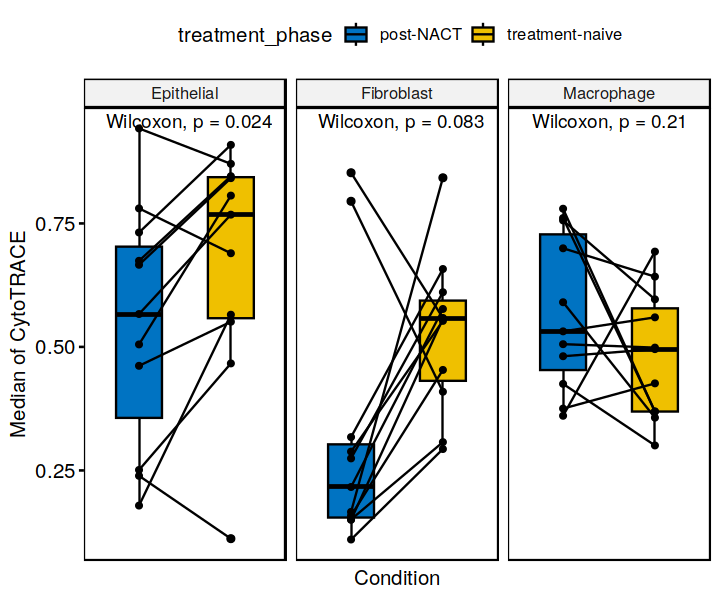

In [229]:
data_CAF_CytoTRACE$cellType <- 'Fibroblast'
data_EOC_CytoTRACE$cellType <- 'Epithelial'
data_Marc_CytoTRACE$cellType <- 'Macrophage'
data_CytoTRACE <- rbind(data_CAF_CytoTRACE,data_EOC_CytoTRACE,data_Marc_CytoTRACE)
data_CytoTRACE <- do.call(rbind,split(data_CytoTRACE,f = data_CytoTRACE$cellType))
data_CytoTRACE <- rbind(subset(data_CytoTRACE,treatment_phase=='post-NACT'),subset(data_CytoTRACE,treatment_phase=='treatment-naive'))
options(repr.plot.height = 5, repr.plot.width = 6)
p4 <- ggpaired(data = data_CytoTRACE,x = 'treatment_phase',y = 'CytoTRACE',ylab = "Median of CytoTRACE",facet.by = 'cellType',show.legend = TRUE ,fill = 'treatment_phase',palette = "jco")+stat_compare_means(paired = T)+theme(axis.ticks.x = element_blank(),axis.text.x = element_blank())
p4

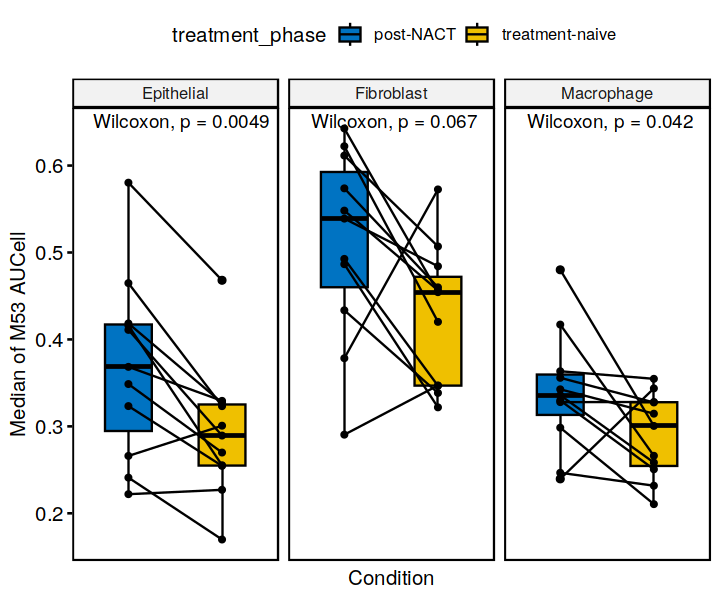

In [228]:
data_CAF_M53$cellType <- 'Fibroblast'
data_EOC_M53$cellType <- 'Epithelial'
data_Marc_M53$cellType <- 'Macrophage'
data_M53 <- rbind(data_CAF_M53,data_EOC_M53,data_Marc_M53)
data_M53 <- do.call(rbind,split(data_M53,f = data_M53$cellType))
data_M53 <- rbind(subset(data_M53,treatment_phase=='post-NACT'),subset(data_M53,treatment_phase=='treatment-naive'))

p5 <- ggpaired(data = data_M53,x = 'treatment_phase',y = 'M53',ylab = "Median of M53 AUCell",facet.by = 'cellType',show.legend = F ,fill = 'treatment_phase',palette = "jco")+stat_compare_means(paired = T)+theme(axis.ticks.x = element_blank(),axis.text.x = element_blank())
p5

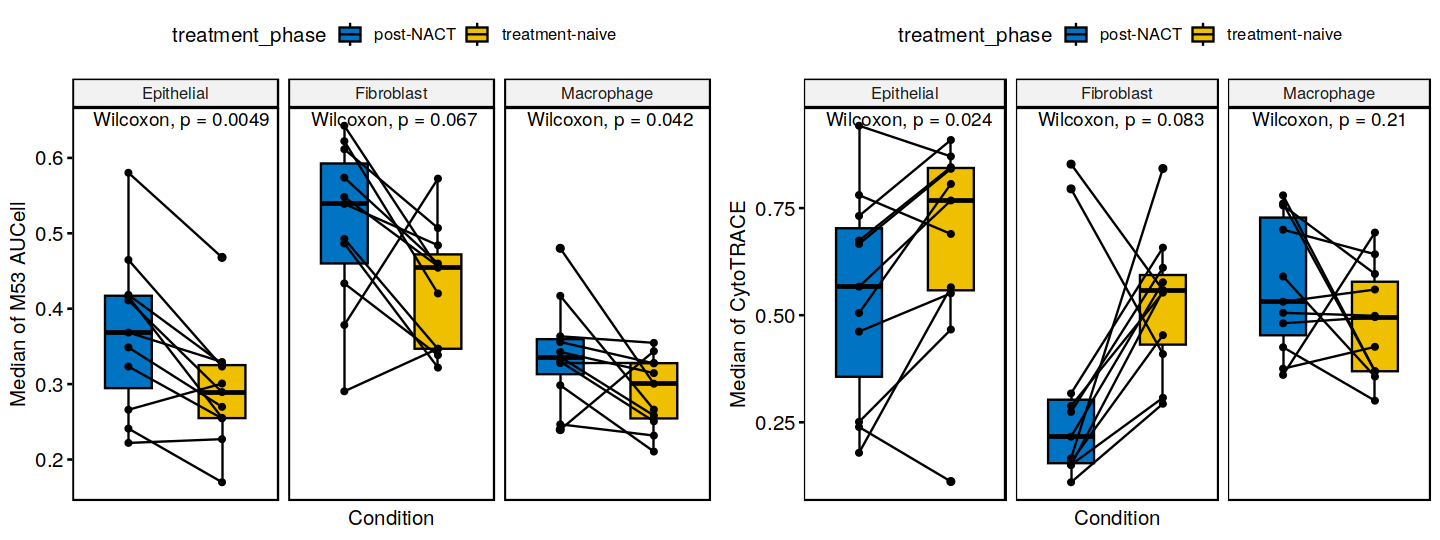

In [230]:
options(repr.plot.height = 4.5, repr.plot.width = 12)
grid.arrange(p5,p4,ncol=2)

In [231]:
pdf(file = './output/bulk/section_5/3.NACT_preVSpost_CytoTRACE_M53_boxplot_combine.pdf',width = 15,height = 6)
grid.arrange(p5,p4,ncol=2)
dev.off()

png 
  2

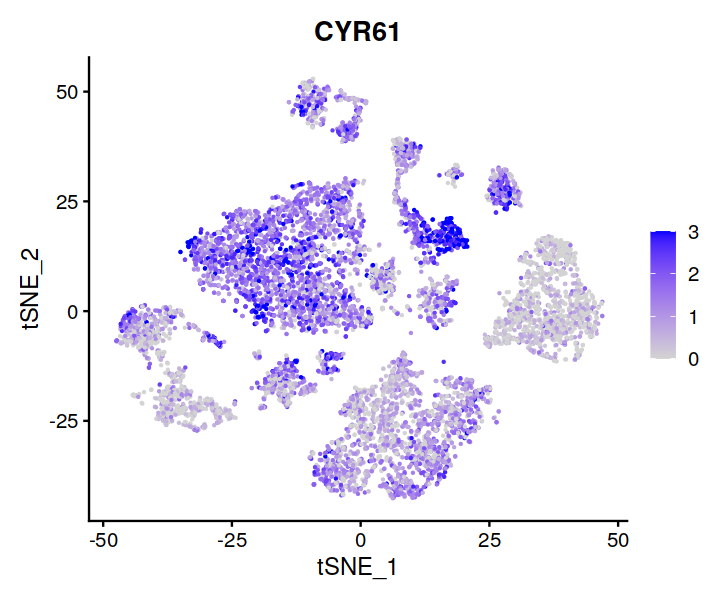

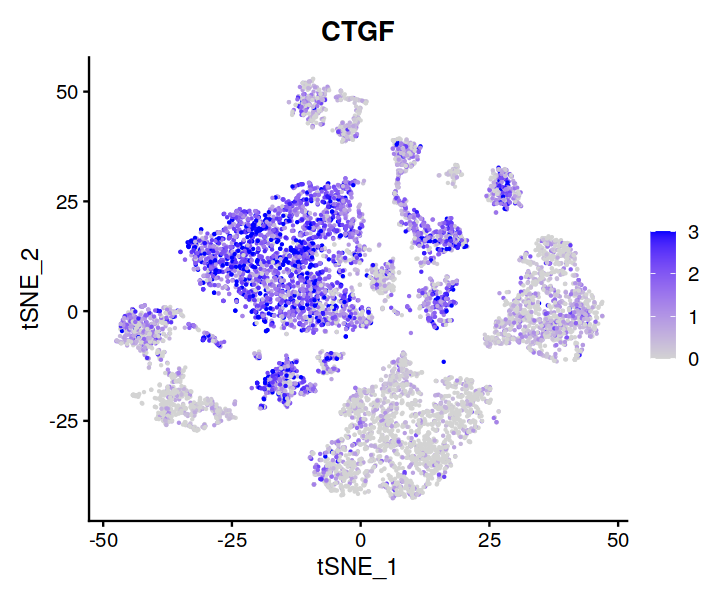

In [8]:
options(repr.plot.height = 5, repr.plot.width = 6)
p2 <- FeaturePlot(OV_GSE165897_EOC,reduction = 'tsne',features = 'CYR61',max.cutoff = 3)
p3 <- FeaturePlot(OV_GSE165897_EOC,reduction = 'tsne',features = 'CTGF',max.cutoff = 3)
p2
p3

In [7]:
CYR61_CTGF_EOC_average <- as.data.frame(t(AverageExpression(object = OV_GSE165897_EOC,features = c('CYR61','CTGF'),group.by = 'sample')$RNA))
CYR61_CTGF_EOC_average$sample <- rownames(CYR61_CTGF_EOC_average)
CYR61_CTGF_EOC_average$treatment_phase <- ifelse(grepl(pattern = 'primary',CYR61_CTGF_EOC_average$sample),'treatment-naive','post-NACT')

In [8]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




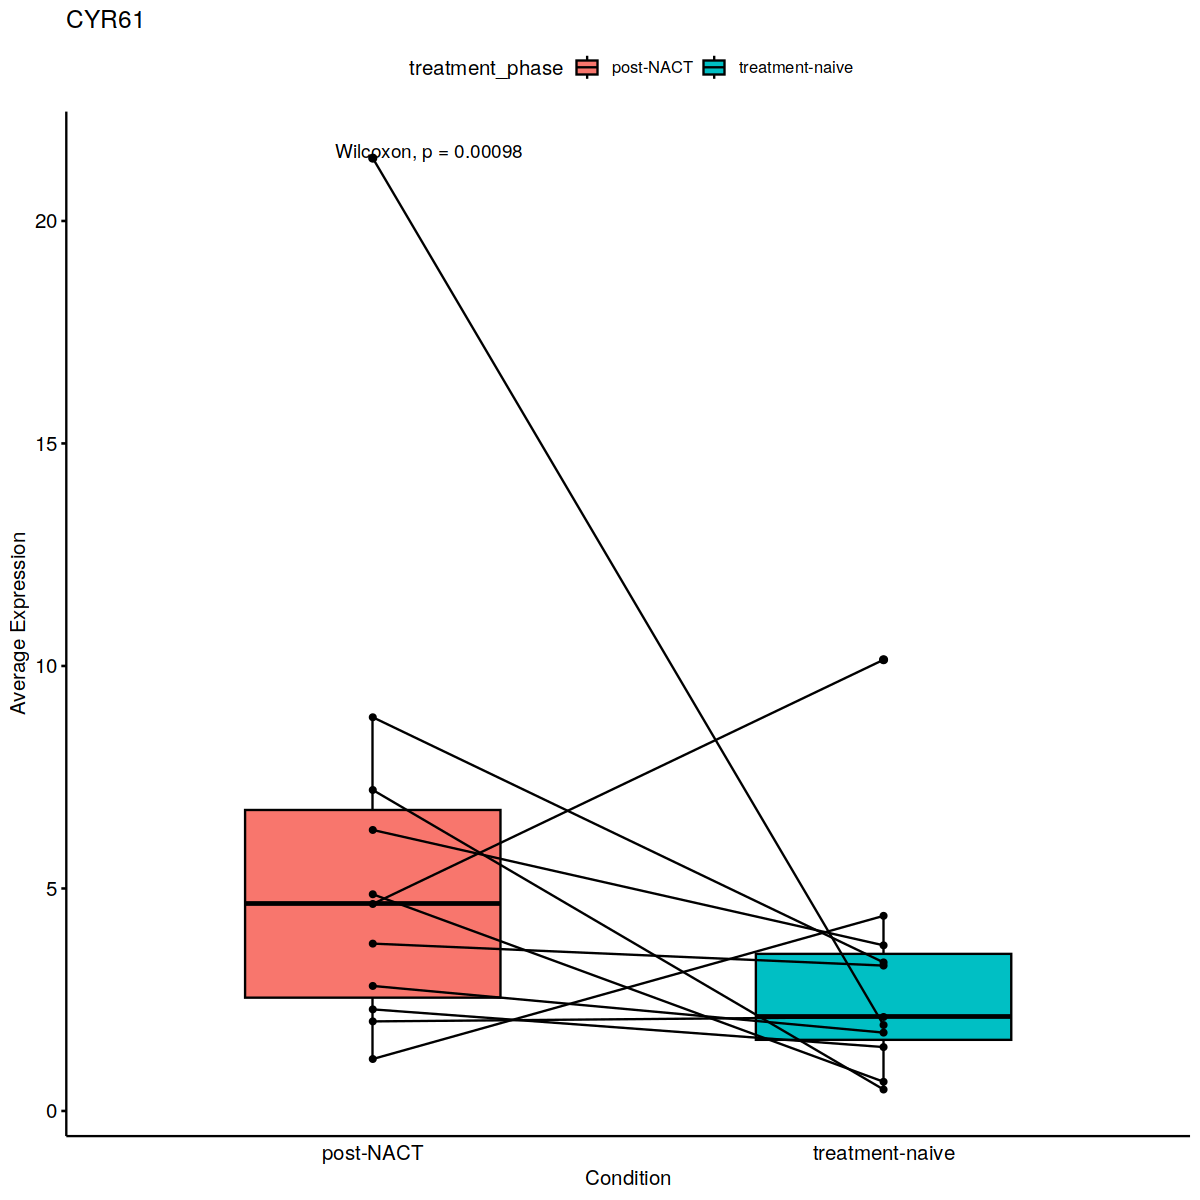

In [26]:
p5 <- ggpaired(data = CYR61_CTGF_EOC_average,x = 'treatment_phase',y = 'CYR61',ylab = "Average Expression",title = 'CYR61',show.legend = F ,fill = 'treatment_phase')+stat_compare_means(paired = T)+theme(axis.ticks.x = element_blank())
p5

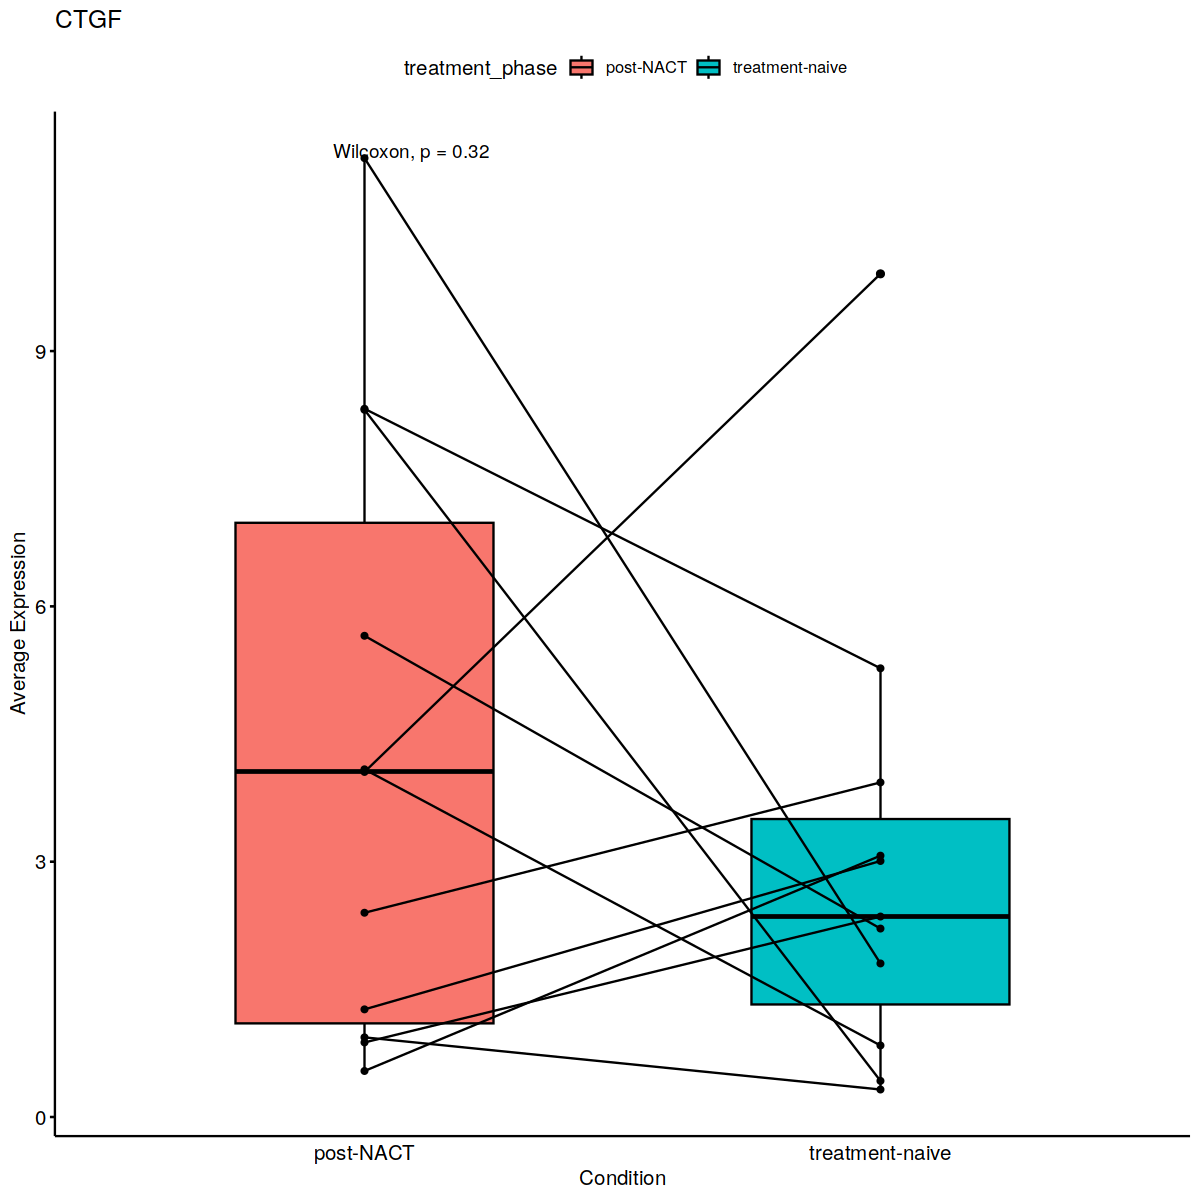

In [27]:
p6 <- ggpaired(data = CYR61_CTGF_EOC_average,x = 'treatment_phase',y = 'CTGF',ylab = "Average Expression",title = 'CTGF',show.legend = T ,fill = 'treatment_phase')+stat_compare_means(paired = T)+theme(axis.ticks.x = element_blank())
p6

In [28]:
pdf(file = './output/bulk/section_5/3.NACT_preVSpost_CYR61andCTGF.pdf',width = 8,height = 8)
grid.arrange(p2,p3,p5,p6,ncol=2)
dev.off()

png 
  2